### CRED Club Defaulters.

In [2]:
# Libraries for handling the DataFrame and the values
import numpy as np, pandas as pd
import seaborn as sns, plotly.express as px
import matplotlib.pyplot as plt

# Warnings if occurs
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Demogtraphic DataSet contains User details as the refernce.
demo_df = pd.read_csv('Demographic data.csv')

### Data Description - Demographic Data

This dataset contains various demographic and employment-related features of customers, as well as their performance status, which is the target variable for prediction. Below is an explanation of each column:

1. **Application ID**  
   - **Description:** A unique identifier assigned to each customer application. This ID helps to distinguish individual records in the dataset.

2. **Age**  
   - **Description:** The age of the customer at the time of the application. This feature can potentially correlate with a customer’s financial behavior and ability to repay debts.

3. **Gender**  
   - **Description:** The gender of the customer. Typically represented as "Male" or "Female," though it could also have other values depending on the dataset format. Gender may influence financial behavior or credit risk patterns.

4. **Marital Status**  
   - **Description:** The marital status of the customer at the time of the application. Possible values could include "Single," "Married," "Divorced," etc. Marital status may affect financial stability and decision-making, such as managing household income or expenses.

5. **No of dependents**  
   - **Description:** The number of dependents (children or others) that the customer is financially responsible for. This can impact the customer’s financial obligations and, potentially, their ability to repay loans.

6. **Income**  
   - **Description:** The income of the customer. Higher income generally implies better repayment capability, while lower income may signal financial distress.

7. **Education**  
   - **Description:** The education level of the customer. It could be categorical, such as "High School," "Undergraduate," "Graduate," or "Postgraduate." Education level often correlates with financial literacy and earning potential.

8. **Profession**  
   - **Description:** The profession of the customer, which may be categorical (e.g., "Engineer," "Teacher," "Doctor," etc.). Profession can provide insight into job stability, income levels, and overall financial health.

9. **Type of residence**  
   - **Description:** The type of residence where the customer lives. This could be "Owned" or "Rented," or have additional values depending on the dataset. Customers living in owned properties might be considered more financially stable compared to renters.

10. **No of months in current residence**  
    - **Description:** The number of months the customer has been living in their current residence. Longer tenure in one residence may indicate stability and commitment, which could correlate with financial reliability.

11. **No of months in current company**  
    - **Description:** The number of months the customer has been employed at their current company. Longer tenure at a job might signal job stability, which can be an indicator of a customer’s ability to repay loans.

12. **Performance Tag**  
    - **Description:** The target variable indicating the financial status of the customer. "1" represents the customer is in **default**, while "0" represents no default. The task is to predict this variable based on the other customer attributes.

### Objective

The goal of this dataset is to predict whether a customer will default on their financial obligations (Performance Tag = 1) or not (Performance Tag = 0) based on their demographic, residential, and employment-related information. A machine learning model will be trained to classify customers into these categories based on features like age, income, marital status, profession, and their history with their residence and company.

Understanding the relationships between these features and customer default behavior is key to building an effective predictive model. The model can help financial institutions assess risk and make informed decisions about loan approvals or credit offerings.


In [4]:
demo_df.head()

Application ID  Age Gender Marital Status (at the time of application)  \
0       954457215   48      F                                     Married   
1       432830445   31      M                                     Married   
2       941387308   32      M                                      Single   
3       392161677   43      M                                     Married   
4       182011211   35      F                                     Married   

   No of dependents  Income     Education Profession  Type of residence  \
0               2.0    40.0      Bachelor         SAL            Rented   
1               4.0    55.0  Professional     SE_PROF            Rented   
2               2.0    46.0      Bachelor     SE_PROF            Rented   
3               1.0    53.0      Bachelor          SE            Rented   
4               5.0    44.0  Professional         SAL            Rented   

   No of months in current residence  No of months in current company  \
0                                113                               56   
1                                112                               46   
2                                104                               49   
3                                 94                               53   
4                                112                               43   

   Performance Tag  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [5]:
# What was the Credit Score and Area he/She have.
cred_df = pd.read_csv('Credit Bureau data.csv')

### Data Description - of  Credit Bureau Data

In this dataset, we have various features that capture customer behavior and credit performance over the past 6 and 12 months. The objective is likely to predict customer default status, indicated by the "Performance Tag," which identifies whether a customer has defaulted on their payments ("1" represents default, and "0" represents no default). Below is an explanation of each column:

1. **Application ID**  
   - **Description:** A unique identifier for each customer application.

2. **No of times 90 DPD or worse in last 6 months**  
   - **Description:** The number of instances the customer has missed payments (90 days or worse) in the last 6 months. This indicates the level of financial distress the customer has experienced recently.

3. **No of times 60 DPD or worse in last 6 months**  
   - **Description:** The number of instances the customer has missed payments (60 days or worse) in the last 6 months. Similar to the previous feature, this helps in understanding payment delays.

4. **No of times 30 DPD or worse in last 6 months**  
   - **Description:** The number of times the customer has missed payments (30 days or worse) in the last 6 months. This feature gives a more granular view of the customer’s payment history.

5. **No of times 90 DPD or worse in last 12 months**  
   - **Description:** The number of instances the customer has missed payments (90 days or worse) in the past 12 months, which gives insight into long-term payment behavior.

6. **No of times 60 DPD or worse in last 12 months**  
   - **Description:** Similar to the 90 DPD feature but considers the last 12 months for payment delays of 60 days or worse.

7. **No of times 30 DPD or worse in last 12 months**  
   - **Description:** The number of instances the customer missed payments (30 days or worse) over the past 12 months.

8. **Avgas CC Utilization in last 12 months**  
   - **Description:** The average credit card utilization by the customer over the past 12 months. High utilization might indicate financial stress or poor credit management.

9. **No of trades opened in last 6 months**  
   - **Description:** The number of trading actions (buy/sell) made by the customer in the past 6 months. A high number of trades could signal active engagement in financial markets.

10. **No of trades opened in last 12 months**  
    - **Description:** Similar to the previous feature, this counts the number of trades the customer has engaged in over the past 12 months.

11. **No of PL trades opened in last 6 months**  
    - **Description:** The number of personal loan trades (PL trades) the customer has initiated in the past 6 months. This could indicate the customer's need for loans and credit.

12. **No of PL trades opened in last 12 months**  
    - **Description:** Similar to the previous feature but over the last 12 months.

13. **No of Inquiries in last 6 months (excluding home & auto loans)**  
    - **Description:** The number of times the customer has inquired about loans or credit (excluding home and auto loans) in the last 6 months. This reflects customer interest in additional credit.

14. **No of Inquiries in last 12 months (excluding home & auto loans)**  
    - **Description:** The number of inquiries in the past 12 months, similar to the previous feature but with a longer time horizon.

15. **Presence of open home loan**  
    - **Description:** A binary variable indicating whether the customer currently has an open home loan. "1" represents the presence of an open home loan, and "0" represents no home loan.

16. **Outstanding Balance**  
    - **Description:** The total outstanding balance on the customer's account. This reflects the customer’s current financial obligation.

17. **Total No of Trades**  
    - **Description:** The total number of trades (including both personal loan and other trades) the customer has engaged in. It gives a broad view of the customer's financial activity.

18. **Presence of open auto loan**  
    - **Description:** A binary variable indicating whether the customer has an active auto loan. "1" means the customer has an open auto loan, and "0" means no auto loan.

19. **Performance Tag**  
    - **Description:** The target variable for this dataset. It indicates whether the customer has defaulted ("1") or not defaulted ("0"). This is the outcome that we want to predict based on the other features.

### Objective

The goal is to use the provided features to predict the **Performance Tag** of a customer, which reflects whether they have defaulted on their payments. The model could use the payment history, credit card utilization, number of trades, and loan-related features to forecast the likelihood of a customer defaulting. We will build a machine learning model to classify customers as likely to default (1) or not (0) based on their past behavior.


In [6]:
cred_df.head()

Application ID  No of times 90 DPD or worse in last 6 months  \
0       954457215                                             0   
1       432830445                                             0   
2       941387308                                             0   
3       392161677                                             0   
4       182011211                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0               

In [7]:
# Fetching out information to gain some results and output
display(demo_df.info())
print("="*120)
display(cred_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Application ID                               71295 non-null  int64  
 1   Age                                          71295 non-null  int64  
 2   Gender                                       71293 non-null  object 
 3   Marital Status (at the time of application)  71289 non-null  object 
 4   No of dependents                             71292 non-null  float64
 5   Income                                       71295 non-null  float64
 6   Education                                    71176 non-null  object 
 7   Profession                                   71281 non-null  object 
 8   Type of residence                            71287 non-null  object 
 9   No of months in current residence            71295 non-null  int64  
 10

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Application ID                                                   71295 non-null  int64  
 1   No of times 90 DPD or worse in last 6 months                     71295 non-null  int64  
 2   No of times 60 DPD or worse in last 6 months                     71295 non-null  int64  
 3   No of times 30 DPD or worse in last 6 months                     71295 non-null  int64  
 4   No of times 90 DPD or worse in last 12 months                    71295 non-null  int64  
 5   No of times 60 DPD or worse in last 12 months                    71295 non-null  int64  
 6   No of times 30 DPD or worse in last 12 months                    71295 non-null  int64  
 7   Avgas CC Utilization in last 12 months  

None

In [8]:
def generate_null_analysis(df):
    count = df.isnull().sum()
    percen = count / len(df) * 100
    
    df_null = pd.DataFrame({
        'column name': df.columns,
        'total count': count,
        'percentage': percen
    })
    
    df_null.reset_index(drop = True, inplace = True)
    df_null_sorted = df_null.sort_values(by = 'percentage', ascending = False)
    df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
    df_filtered.reset_index(drop = True, inplace = True)
    
    return df_filtered

df_filtered_cred = generate_null_analysis(cred_df)
df_filtered_demo = generate_null_analysis(demo_df)

def style_null_analysis(df):
    return df.style.background_gradient(cmap = 'YlOrRd', subset = ['percentage', 'total count'])

df_filtered_cred_styled = style_null_analysis(df_filtered_cred)
df_filtered_demo_styled = style_null_analysis(df_filtered_demo)

In [9]:
display(df_filtered_cred_styled)

In [10]:
display(df_filtered_demo_styled)

    Data Info to check the Data Avaliable here.

In [11]:
print(f"The Rows Demographic dataset contains : {demo_df.shape[0]}\nThe Columns dataset contains : {demo_df.shape[1]}")
print("-"*50)
print(f"The Rows Creditor dataset contains : {cred_df.shape[0]}\nThe Columns dataset contains : {cred_df.shape[1]}")
print("-"*50)

The Rows Demographic dataset contains : 71295
The Columns dataset contains : 12
--------------------------------------------------
The Rows Creditor dataset contains : 71295
The Columns dataset contains : 19
--------------------------------------------------


In [12]:
# Having a Look in the Columns for next suggestion and answer.
print(demo_df.columns)
print("-"*100)
# Having a Look in the Columns for next suggestion and answer.
print(cred_df.columns)
print("-"*100)

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 mo

    Now Whats going on target column in both the Scenarios as they both have the columns
    
        NOTE :- Why there are two Performance Tag in both the Files are they same or Differ
                And why are the in two column, so need to figure out.

In [13]:
print(f"The Uniqueness Demographic dataset contains !\n ---->  {cred_df['Performance Tag'].unique()}")
print("-"*50)
print(f"The Uniqueness Creditor dataset contains !\n ---->  {cred_df['Performance Tag'].unique()}")

The Uniqueness Demographic dataset contains !
 ---->  [ 0.  1. nan]
--------------------------------------------------
The Uniqueness Creditor dataset contains !
 ---->  [ 0.  1. nan]


In [14]:
print(f"Values in Demographic !\n{cred_df['Performance Tag'].value_counts()}")
print("-"*50)
print(f"Values in Creditor !\n{demo_df['Performance Tag'].value_counts()}")

Values in Demographic !
Performance Tag
0.0    66922
1.0     2948
Name: count, dtype: int64
--------------------------------------------------
Values in Creditor !
Performance Tag
0.0    66922
1.0     2948
Name: count, dtype: int64


#### Working on the Demographic DataSet.

In [15]:
!pip install plotly

In [16]:
# Calculate value counts and percentages for Performance Tag
import plotly.graph_objects as go

performance_counts = demo_df['Performance Tag'].value_counts()
performance_percentages = (performance_counts / len(demo_df)) * 100

# Prepare data for pie chart
labels = [f"{int(idx)} ({percentage:.2f}%)" for idx, percentage in performance_percentages.items()]
sizes = performance_counts.values

# Create a Plotly pie chart
fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=sizes,
            textinfo='label+percent',
            textfont_size=14,
            marker=dict(colors=['#4DAF4A', '#FF7F00'], line=dict(color='#000000', width=1)),
            pull=[0.1 if value == max(sizes) else 0 for value in sizes]  # Highlight largest segment
        )
    ]
)

# Update layout to match the provided image style
fig.update_layout(
    title_text='Performance Tag Distribution',
    title_font_size=16,
    showlegend=False,
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.show()

In [17]:
style_null_analysis(generate_null_analysis(demo_df))

In [18]:
def value_counter(df, col) :
    print(f"There are {df[col].value_counts().count()} Unique {col}")
    
    coun = df[col].value_counts()
    perc = round(df[col].value_counts(normalize=True),2) * 100
    df_brand = pd.DataFrame({
        'total count' : coun,
        'percentage' : perc
    })

    return df_brand

In [19]:
for col in df_filtered_demo['column name'].tolist() :
    print("-"*50)
    display(value_counter(demo_df, col))

--------------------------------------------------
There are 2 Unique Performance Tag


total count  percentage
Performance Tag                         
0.0                    66922        96.0
1.0                     2948         4.0

--------------------------------------------------
There are 5 Unique Education


total count  percentage
Education                            
Professional        24839        35.0
Masters             23970        34.0
Bachelor            17697        25.0
Phd                  4549         6.0
Others                121         0.0

--------------------------------------------------
There are 3 Unique Profession 


total count  percentage
Profession                          
SAL                40439        57.0
SE_PROF            16535        23.0
SE                 14307        20.0

--------------------------------------------------
There are 5 Unique Type of residence


total count  percentage
Type of residence                           
Rented                     53397        75.0
Owned                      14243        20.0
Living with Parents         1818         3.0
Company provided            1630         2.0
Others                       199         0.0

--------------------------------------------------
There are 2 Unique Marital Status (at the time of application)


total count  percentage
Marital Status (at the time of application)                         
Married                                            60730        85.0
Single                                             10559        15.0

--------------------------------------------------
There are 5 Unique No of dependents


total count  percentage
No of dependents                         
3.0                     16279        23.0
1.0                     15387        22.0
2.0                     15289        21.0
4.0                     12222        17.0
5.0                     12115        17.0

--------------------------------------------------
There are 2 Unique Gender


total count  percentage
Gender                         
M             54456        76.0
F             16837        24.0

In [20]:
demo_df.shape

(71295, 12)

In [21]:
demo_df.shape[0] - len(demo_df[demo_df['Performance Tag'].isnull()])

69870

In [22]:
# demo_df.drop(demo_df[demo_df['Performance Tag'].isnull()].index, inplace = True, axis = 0)

In [23]:
demo_df.shape

(71295, 12)

In [24]:
# for col in df_filtered_demo['column name'].tolist():  
#     demo_df[col].fillna(demo_df[col].mode()[0], inplace=True)

In [25]:
style_null_analysis(generate_null_analysis(demo_df))

In [26]:
demo_df.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [27]:
demo_df.head()

Application ID  Age Gender Marital Status (at the time of application)  \
0       954457215   48      F                                     Married   
1       432830445   31      M                                     Married   
2       941387308   32      M                                      Single   
3       392161677   43      M                                     Married   
4       182011211   35      F                                     Married   

   No of dependents  Income     Education Profession  Type of residence  \
0               2.0    40.0      Bachelor         SAL            Rented   
1               4.0    55.0  Professional     SE_PROF            Rented   
2               2.0    46.0      Bachelor     SE_PROF            Rented   
3               1.0    53.0      Bachelor          SE            Rented   
4               5.0    44.0  Professional         SAL            Rented   

   No of months in current residence  No of months in current company  \
0                                113                               56   
1                                112                               46   
2                                104                               49   
3                                 94                               53   
4                                112                               43   

   Performance Tag  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [28]:
def upper_converter(data) :
    for col in data.columns:
        if data[col].dtype == object:
            data[col] = data[col].str.upper()

upper_converter(demo_df)

demo_df.duplicated().sum()

0

In [29]:
demo_df.rename(columns = {(demo_df.columns[3]) : 'Marital Status'})

Application ID  Age Gender Marital Status  No of dependents  Income  \
0           954457215   48      F        MARRIED               2.0    40.0   
1           432830445   31      M        MARRIED               4.0    55.0   
2           941387308   32      M         SINGLE               2.0    46.0   
3           392161677   43      M        MARRIED               1.0    53.0   
4           182011211   35      F        MARRIED               5.0    44.0   
...               ...  ...    ...            ...               ...     ...   
71290       254036864   44      M        MARRIED               3.0    15.0   
71291       375231276   24      M         SINGLE               1.0     4.5   
71292        32481239   33      M        MARRIED               4.0     6.0   
71293       704812159   52      M        MARRIED               3.0     4.5   
71294        37493797   54      M        MARRIED               3.0    42.0   

          Education Profession  Type of residence  \
0          BACHELOR         SAL            RENTED   
1      PROFESSIONAL     SE_PROF            RENTED   
2          BACHELOR     SE_PROF            RENTED   
3          BACHELOR          SE            RENTED   
4      PROFESSIONAL         SAL            RENTED   
...             ...         ...               ...   
71290  PROFESSIONAL         SAL            RENTED   
71291      BACHELOR         SAL             OWNED   
71292      BACHELOR     SE_PROF            RENTED   
71293      BACHELOR          SE            RENTED   
71294      BACHELOR          SE            RENTED   

       No of months in current residence  No of months in current company  \
0                                    113                               56   
1                                    112                               46   
2                                    104                               49   
3                                     94                               53   
4                                    112                               43   
...                                  ...                              ...   
71290                                  6                                3   
71291                                 20                                7   
71292                                 37                               25   
71293                                 76                               57   
71294                                 96                               29   

       Performance Tag  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
71290              0.0  
71291              1.0  
71292              0.0  
71293              0.0  
71294              0.0  

[71295 rows x 12 columns]

##### Lets start with the Explaratory Data Analysis.

In [30]:
demo_df['Age'].unique()

array([48, 31, 32, 43, 35, 20, 42, 34, 30, 22, 37, 41, 38, 33, 45, 51, 36,
       29, 40, 19, 25, 28, 50, 27, 26, 49, 47, 39, 17, 44, 23, 46, 52, 53,
       24, 18, 15, 21, 16, 64, 56, 55, 60, 59, 54, 58, 62, 65, 61, 57, 63,
        0, -3], dtype=int64)

In [31]:
demo_df[demo_df['Age'] <= 0]

Application ID  Age Gender Marital Status (at the time of application)  \
9111        964427213    0      M                                     MARRIED   
16315       634180637   -3      M                                     MARRIED   
20752       590303560    0      M                                     MARRIED   
29929       492869740    0      M                                      SINGLE   
34548       932483616    0      M                                     MARRIED   
35606       666398799    0      F                                     MARRIED   
44090       790296430    0      M                                      SINGLE   
50153       463622314    0      M                                     MARRIED   
55558       441104387    0      M                                      SINGLE   
55578       862922520    0    NaN                                     MARRIED   
56153       380153306    0      M                                     MARRIED   
62096       783195548    0      M                                     MARRIED   
63966       331033631    0      M                                     MARRIED   
65230       809393409    0      M                                      SINGLE   
65458       325992471    0      M                                     MARRIED   
66896       977872820    0      M                                     MARRIED   
67602       915848904    0      M                                     MARRIED   
68043       852875477    0      M                                         NaN   
68440       585528536    0      F                                     MARRIED   
69026       848965588    0      F                                     MARRIED   

       No of dependents  Income     Education Profession  Type of residence  \
9111                3.0    19.0  PROFESSIONAL     SE_PROF            RENTED   
16315               2.0    53.0       MASTERS     SE_PROF            RENTED   
20752               4.0    31.0       MASTERS     SE_PROF            RENTED   
29929               2.0    18.0       MASTERS     SE_PROF            RENTED   
34548               2.0    42.0       MASTERS          SE            RENTED   
35606               5.0    47.0      BACHELOR     SE_PROF            RENTED   
44090               4.0    43.0  PROFESSIONAL         SAL             OWNED   
50153               3.0     7.0       MASTERS         SAL             OWNED   
55558               2.0    26.0  PROFESSIONAL     SE_PROF            RENTED   
55578               3.0    59.0      BACHELOR          SE             OWNED   
56153               4.0    41.0      BACHELOR         SAL  COMPANY PROVIDED   
62096               3.0    30.0           PHD     SE_PROF            RENTED   
63966               5.0    37.0  PROFESSIONAL         SAL            RENTED   
65230               1.0    34.0           PHD         SAL            RENTED   
65458               1.0    36.0  PROFESSIONAL         SAL             OWNED   
66896               2.0    45.0  PROFESSIONAL         SAL            RENTED   
67602               2.0    15.0           PHD     SE_PROF            RENTED   
68043               1.0     5.0           PHD         NaN             OWNED   
68440               3.0    25.0      BACHELOR         SAL             OWNED   
69026               NaN    59.0       MASTERS         SAL            RENTED   

       No of months in current residence  No of months in current company  \
9111                                   6                               41   
16315                                  6                               37   
20752                                  6                               47   
29929                                  6                               66   
34548                                  6                               64   
35606                                  6                               16   
44090                                 73                               10   
50153                        

In [32]:
demo_df.drop(demo_df[demo_df['Age'] <= 0].index, inplace = True, axis = 0)

In [33]:
demo_df['Age'].unique()

array([48, 31, 32, 43, 35, 20, 42, 34, 30, 22, 37, 41, 38, 33, 45, 51, 36,
       29, 40, 19, 25, 28, 50, 27, 26, 49, 47, 39, 17, 44, 23, 46, 52, 53,
       24, 18, 15, 21, 16, 64, 56, 55, 60, 59, 54, 58, 62, 65, 61, 57, 63],
      dtype=int64)

In [34]:
demo_df.isnull().sum()[demo_df.isnull().sum() > 0]

Gender                                            1
Marital Status (at the time of application)       5
No of dependents                                  2
Education                                       119
Profession                                       13
Type of residence                                 8
Performance Tag                                1425
dtype: int64

In [35]:
demo_df.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

In [36]:
print("Total Ages :", demo_df['Age'].unique())
print("Minimum ages among all : ", demo_df['Age'].min())
print("Maximum ages among all : ", demo_df['Age'].max())

Total Ages : [48 31 32 43 35 20 42 34 30 22 37 41 38 33 45 51 36 29 40 19 25 28 50 27
 26 49 47 39 17 44 23 46 52 53 24 18 15 21 16 64 56 55 60 59 54 58 62 65
 61 57 63]
Minimum ages among all :  15
Maximum ages among all :  65


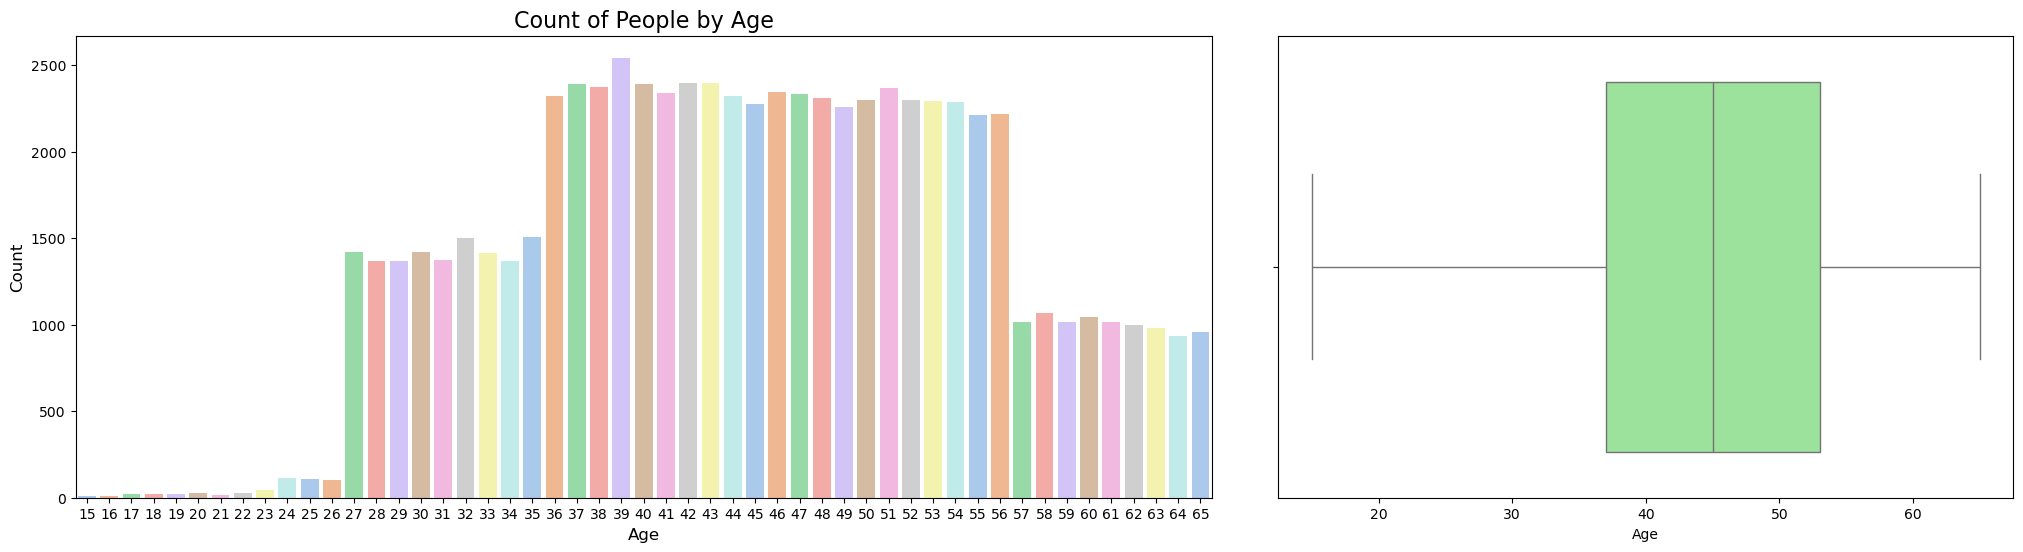

In [37]:
plt.figure(figsize=[25, 6])

# Use GridSpec for custom subplot proportions  
from matplotlib.gridspec import GridSpec  

gs = GridSpec(1, 5)

plt.subplot(gs[0, 0:3])
sns.countplot(x='Age', data=demo_df, palette='pastel', order=sorted(demo_df['Age'].unique()))  
plt.title('Count of People by Age', fontsize=16)  
plt.xlabel('Age', fontsize=12)  
plt.ylabel('Count', fontsize=12)  

plt.subplot(gs[0, 3:5])
sns.boxplot(x='Age', data=demo_df, color='lightgreen')  

plt.tight_layout
plt.show()  

In [38]:
demo_df['Age Group'] = pd.cut(
    demo_df['Age'],
    bins = [0, 20, 50, float('inf')],
    labels = ["Young", "Middle-aged", "Senior"]
)

demo_df[["Age", "Age Group"]].head()

Age    Age Group
0   48  Middle-aged
1   31  Middle-aged
2   32  Middle-aged
3   43  Middle-aged
4   35  Middle-aged

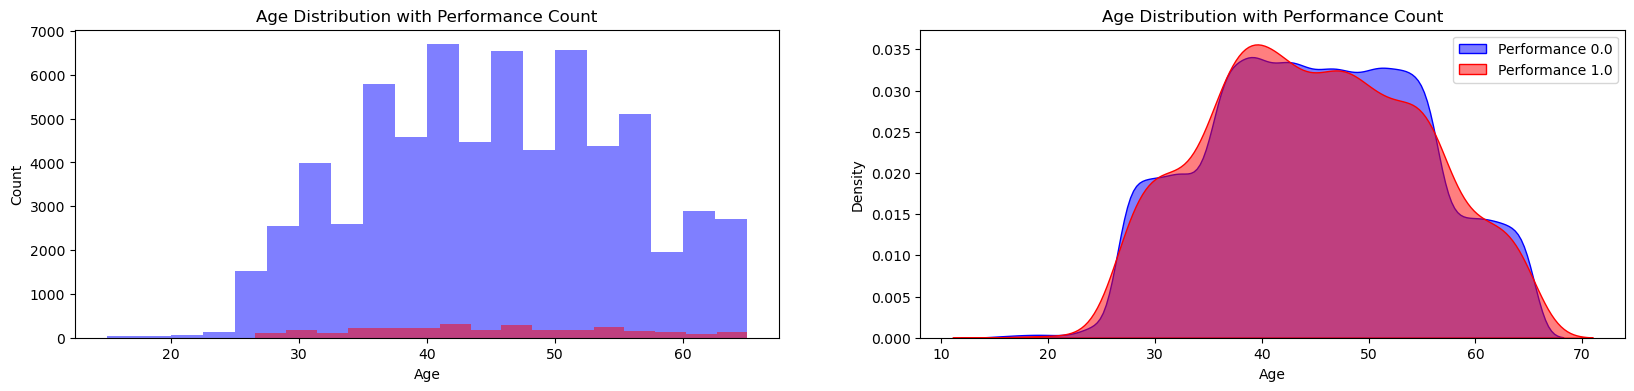

In [39]:
plt.figure(figsize = [20, 4])

plt.subplot(1, 2, 1)
plt.hist(demo_df[demo_df['Performance Tag'] == 0.0]['Age'], bins=20, alpha=0.5, label='Performance 0.0', color='blue')
plt.hist(demo_df[demo_df['Performance Tag'] == 1.0]['Age'], bins=20, alpha=0.5, label='Performance 1.0', color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution with Performance Count')

plt.subplot(1, 2, 2)
sns.kdeplot(data=demo_df[demo_df['Performance Tag'] == 0.0], x='Age', fill=True, color='blue', alpha=0.5, label='Performance 0.0')
sns.kdeplot(data=demo_df[demo_df['Performance Tag'] == 1.0], x='Age', fill=True, color='red', alpha=0.5, label='Performance 1.0')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution with Performance Count')
plt.legend()
plt.show()

In [40]:
demo_df.groupby('Age Group').agg(
    Performace_cnt = ('Performance Tag', 'size'),
    Performace_ratio_1 = ('Performance Tag', 'sum')
)

Performace_cnt  Performace_ratio_1
Age Group                                      
Young                   121                 3.0
Middle-aged           48451              2027.0
Senior                22703               918.0

In [41]:
demo_df['Gender'].value_counts()

Gender
M    54440
F    16834
Name: count, dtype: int64

In [42]:
demo_df.rename(columns = {'Marital Status (at the time of application)' : 'Marital Status Onboard'}, inplace = True)

In [43]:
print(demo_df['Marital Status Onboard'].value_counts())
print(50 * '-')
print(demo_df['Education'].value_counts())
print(50 * '-')
print(demo_df['Profession '].value_counts())
print(50 * '-')
print(demo_df['Type of residence'].value_counts())

Marital Status Onboard
MARRIED    60715
SINGLE     10555
Name: count, dtype: int64
--------------------------------------------------
Education
PROFESSIONAL    24833
MASTERS         23964
BACHELOR        17693
PHD              4545
OTHERS            121
Name: count, dtype: int64
--------------------------------------------------
Profession 
SAL        40430
SE_PROF    16527
SE         14305
Name: count, dtype: int64
--------------------------------------------------
Type of residence
RENTED                 53384
OWNED                  14237
LIVING WITH PARENTS     1818
COMPANY PROVIDED        1629
OTHERS                   199
Name: count, dtype: int64


In [44]:
print("No of dependents : ", demo_df['No of dependents'].unique())
print(70 * '-')
print("Income : ", demo_df['Income'].unique())
print(70 * '-')
print("No of months in current residence : ", demo_df['No of months in current residence'].unique())
print(70 * '-')
print("No of months in current company : ", demo_df['No of months in current company'].unique())

No of dependents :  [ 2.  4.  1.  5.  3. nan]
----------------------------------------------------------------------
Income :  [40.  55.  46.  53.  44.  39.  49.  48.  38.  43.  51.  54.  50.  28.
 52.  27.  37.  36.  42.  32.  24.  25.  47.  31.  33.  35.  26.  34.
 41.  45.  13.  19.  29.  18.   7.  30.  23.  21.  14.   2.  22.   3.
  6.  15.  16.  20.  11.  17.  12.   5.   4.  10.   9.  -0.5  8.   1.
  0.   4.5 60.  57.  59.  58.  56. ]
----------------------------------------------------------------------
No of months in current residence :  [113 112 104  94 116 108 115 111  90  83 106  81 100 107  96  92 103  82
  97  80  77  76  86  54  93  98  64  58  91  84  71 101  99 109 110 114
  70  72  95  69 105  89  74  44  53  63  85 102  56  78  66  75  79  29
  88  87  73  67  68  61  34  40  48  65  60  62  46  59  33  50  49  35
  37  18  43  30  52  32  26  38  25   7  47  23  13  41  51  20  36  57
  28  11  16  42   6  55  39  45  17  14  31  22  24  21  10  27   9  19
  12  15  

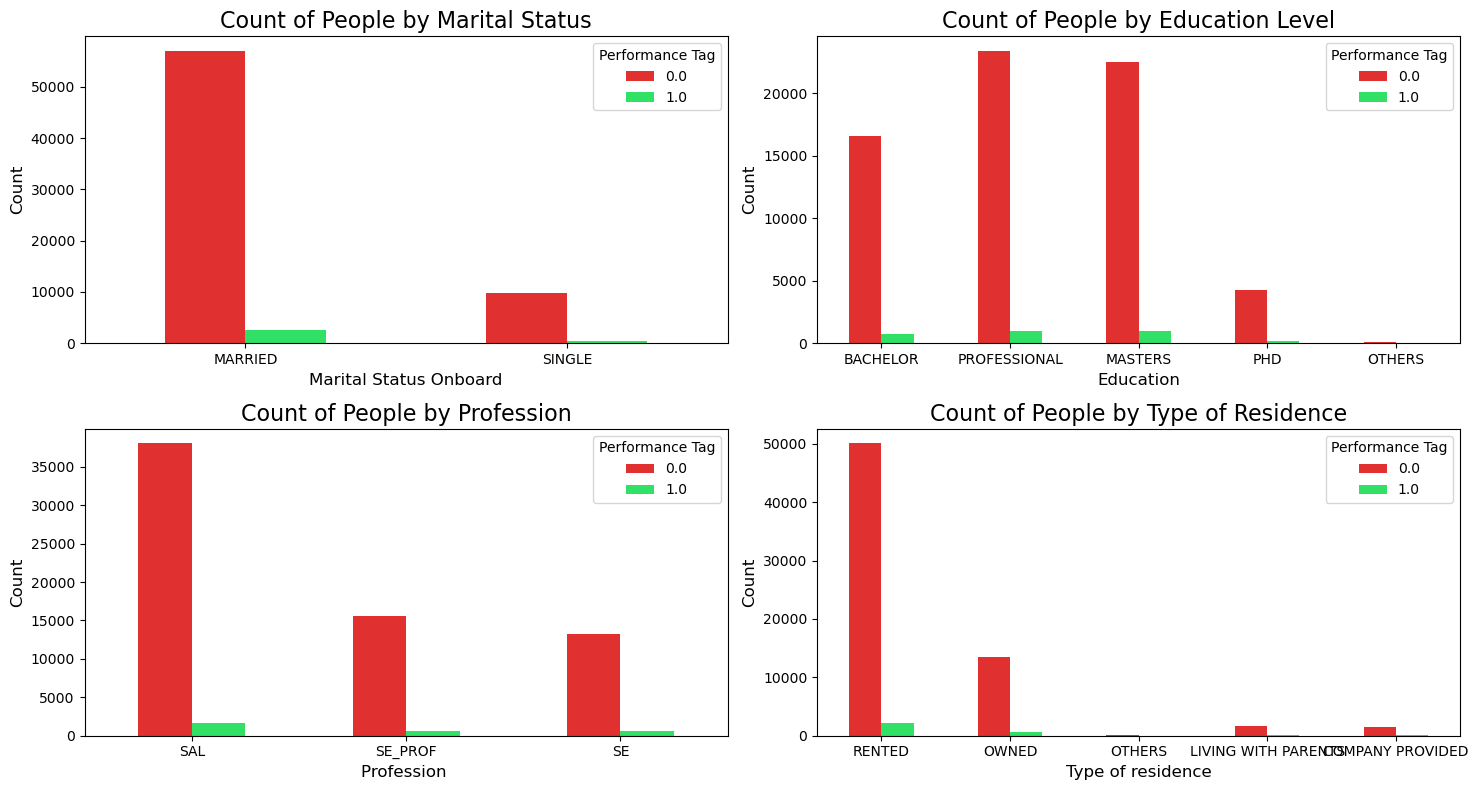

In [45]:
features = [  
    ('Marital Status Onboard', 'Count of People by Marital Status'),  
    ('Education', 'Count of People by Education Level'),  
    ('Profession ', 'Count of People by Profession'),  
    ('Type of residence', 'Count of People by Type of Residence')  
]   

plt.figure(figsize=[15, 8])  

dark_pastel_colors = ["#FF1212", "#12FF5A"]  # Replace with darker pastel colors as desired  

for i, (feature, title) in enumerate(features, start=1):  
    plt.subplot(2, 2, i)  
    sns.countplot(x=feature, data=demo_df, hue='Performance Tag', width=0.5, palette = dark_pastel_colors)
    plt.title(title, fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)  
    plt.legend(title='Performance Tag')  # Add legend for clarity  

plt.tight_layout()  
plt.show()

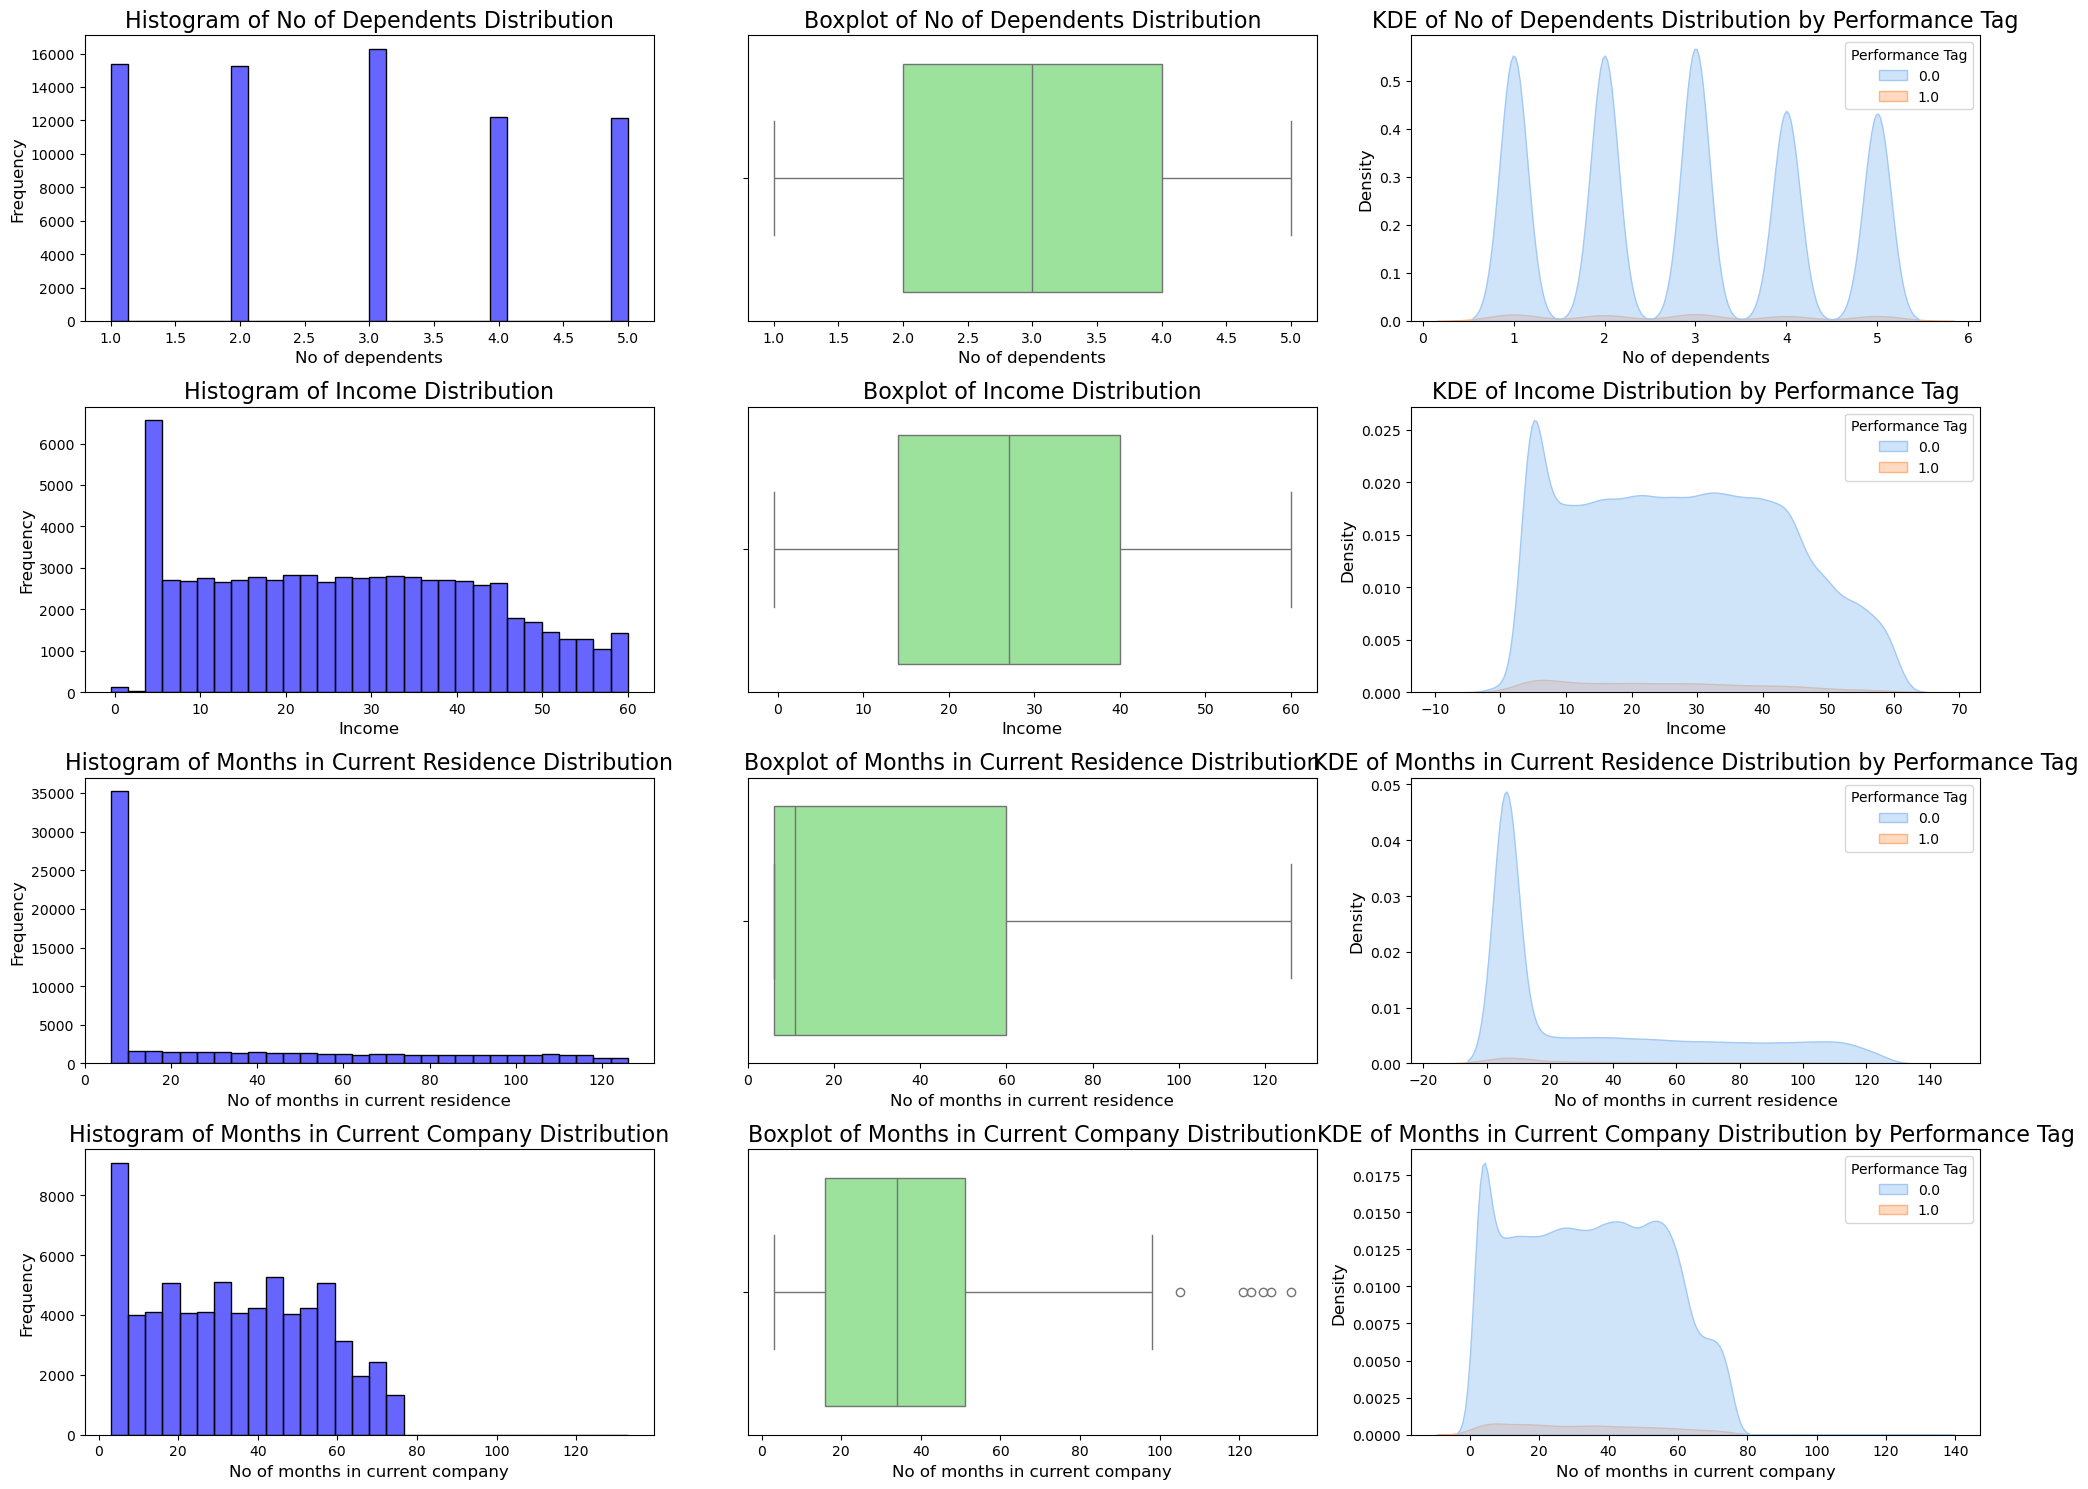

In [46]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# Set the figure size  
plt.figure(figsize=(20, 15))  

# Features and titles  
features = [  
    ('No of dependents', 'No of Dependents Distribution'),  
    ('Income', 'Income Distribution'),  
    ('No of months in current residence', 'Months in Current Residence Distribution'),  
    ('No of months in current company', 'Months in Current Company Distribution')  
]  

# Iterate over the features to create the plots for each feature  
for i, (feature, title) in enumerate(features, start=1):  
    # Create subplots (3 rows for histogram, boxplot, and KDE)  
    plt.subplot(4, 3, (i - 1) * 3 + 1)  # Histogram  
    sns.histplot(demo_df[feature], bins=30, kde=False, color='blue', alpha=0.6)  
    plt.title(f'Histogram of {title}', fontsize=16)  
    plt.xlabel(feature, fontsize=12)  
    plt.ylabel('Frequency', fontsize=12)  

    plt.subplot(4, 3, (i - 1) * 3 + 2)  # Boxplot  
    sns.boxplot(x=demo_df[feature], color='lightgreen')  
    plt.title(f'Boxplot of {title}', fontsize=16)  
    plt.xlabel(feature, fontsize=12)  
    
    plt.subplot(4, 3, (i - 1) * 3 + 3)  # KDE plot based on Performance Tag  
    sns.kdeplot(data=demo_df, x=feature, hue='Performance Tag', fill=True, palette='pastel', alpha=0.5)  
    plt.title(f'KDE of {title} by Performance Tag', fontsize=16)  
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()

In [47]:
demo_df['No of months in current residence'].unique()

array([113, 112, 104,  94, 116, 108, 115, 111,  90,  83, 106,  81, 100,
       107,  96,  92, 103,  82,  97,  80,  77,  76,  86,  54,  93,  98,
        64,  58,  91,  84,  71, 101,  99, 109, 110, 114,  70,  72,  95,
        69, 105,  89,  74,  44,  53,  63,  85, 102,  56,  78,  66,  75,
        79,  29,  88,  87,  73,  67,  68,  61,  34,  40,  48,  65,  60,
        62,  46,  59,  33,  50,  49,  35,  37,  18,  43,  30,  52,  32,
        26,  38,  25,   7,  47,  23,  13,  41,  51,  20,  36,  57,  28,
        11,  16,  42,   6,  55,  39,  45,  17,  14,  31,  22,  24,  21,
        10,  27,   9,  19,  12,  15,   8, 120, 122, 118, 119, 123, 117,
       121, 126, 125, 124], dtype=int64)

In [48]:
demo_df[demo_df['No of months in current residence'] < 10]

Application ID  Age Gender Marital Status Onboard  No of dependents  \
577         975786946   53      M                MARRIED               5.0   
810         788141600   52      F                MARRIED               1.0   
925         888738787   41      M                MARRIED               5.0   
1162        356115858   40      F                MARRIED               5.0   
1255        491139726   37      F                MARRIED               2.0   
...               ...  ...    ...                    ...               ...   
71281       469441391   27      M                MARRIED               2.0   
71283       892747476   45      M                MARRIED               4.0   
71284       271521624   40      M                MARRIED               3.0   
71285       314764912   37      M                MARRIED               4.0   
71290       254036864   44      M                MARRIED               3.0   

       Income     Education Profession  Type of residence  \
577      41.0  PROFESSIONAL         SAL  COMPANY PROVIDED   
810       5.0       MASTERS         SAL            RENTED   
925      52.0  PROFESSIONAL         SAL            RENTED   
1162     46.0           PHD         SAL             OWNED   
1255     47.0       MASTERS          SE            RENTED   
...       ...           ...         ...               ...   
71281    30.0  PROFESSIONAL     SE_PROF            RENTED   
71283     4.5      BACHELOR         SAL            RENTED   
71284    19.0      BACHELOR          SE             OWNED   
71285    55.0  PROFESSIONAL     SE_PROF            RENTED   
71290    15.0  PROFESSIONAL         SAL            RENTED   

       No of months in current residence  No of months in current company  \
577                                    7                               58   
810                                    6                              128   
925                                    6                               49   
1162                                   6                               57   
1255                                   6                               50   
...                                  ...                              ...   
71281                                  6                                4   
71283                                  6                               12   
71284                                  6                               54   
71285                                  6                               11   
71290                                  6                                3   

       Performance Tag    Age Group  
577                0.0       Senior  
810                0.0       Senior  
925                0.0  Middle-aged  
1162               0.0  Middle-aged  
1255               0.0  Middle-aged  
...                ...          ...  
71281              1.0  Middle-aged  
71283              0.0  Middle-aged  
71284              1.0  Middle-aged  
71285              0.0  Middle-aged  
71290              0.0  Middle-aged  

[35186 rows x 13 columns]

In [49]:
demo_df.shape

(71275, 13)

In [50]:
69850 - 34686

35164

In [51]:
demo_df.columns

Index(['Application ID', 'Age', 'Gender', 'Marital Status Onboard',
       'No of dependents', 'Income', 'Education', 'Profession ',
       'Type of residence', 'No of months in current residence',
       'No of months in current company', 'Performance Tag', 'Age Group'],
      dtype='object')

#### Working on the Creditors DataFrame

In [52]:
cred_df.head()

Application ID  No of times 90 DPD or worse in last 6 months  \
0       954457215                                             0   
1       432830445                                             0   
2       941387308                                             0   
3       392161677                                             0   
4       182011211                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0               

In [53]:
cred_df.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')

In [54]:
display(df_filtered_cred_styled)

In [55]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Application ID                                                   71295 non-null  int64  
 1   No of times 90 DPD or worse in last 6 months                     71295 non-null  int64  
 2   No of times 60 DPD or worse in last 6 months                     71295 non-null  int64  
 3   No of times 30 DPD or worse in last 6 months                     71295 non-null  int64  
 4   No of times 90 DPD or worse in last 12 months                    71295 non-null  int64  
 5   No of times 60 DPD or worse in last 12 months                    71295 non-null  int64  
 6   No of times 30 DPD or worse in last 12 months                    71295 non-null  int64  
 7   Avgas CC Utilization in last 12 months  

In [56]:
cred_df.describe()

Application ID  No of times 90 DPD or worse in last 6 months  \
count    7.129500e+04                                  71295.000000   
mean     4.989601e+08                                      0.270313   
std      2.885905e+08                                      0.534166   
min      1.004500e+05                                      0.000000   
25%      2.483719e+08                                      0.000000   
50%      4.975698e+08                                      0.000000   
75%      7.495868e+08                                      0.000000   
max      1.000084e+09                                      3.000000   

       No of times 60 DPD or worse in last 6 months  \
count                                  71295.000000   
mean                                       0.430535   
std                                        0.825334   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                        5.000000   

       No of times 30 DPD or worse in last 6 months  \
count                                  71295.000000   
mean                                       0.577207   
std                                        1.074436   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                        7.000000   

       No of times 90 DPD or worse in last 12 months  \
count                                   71295.000000   
mean                                        0.450340   
std                                         0.808387   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         5.000000   

       No of times 60 DPD or worse in last 12 months  \
count                                   71295.000000   
mean                                        0.655488   
std                                         1.089535   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         7.000000   

       No of times 30 DPD or worse in last 12 months  \
count                                   71295.000000   
mean                                        0.800912   
std                                         1.331940   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         1.000000   
max                                         9.000000   

       Avgas CC Utilization in last 12 months  \
count                            70237.000000   
mean                                29.696926   
std                                 29.533308   
min                                  0.000000   
25%                                  8.000000   
50%                                 15.000000   
75%                                 46.000000   
max                                113.000000   

       No of trades opened in last 6 months  \
count                          71294.000000   
mean                               2.298048   
std                                2.070191   
min                                0.000000   
25%                                1.000000   
50%                                2.000000   
75%                                3.000000   
max                               12.00000

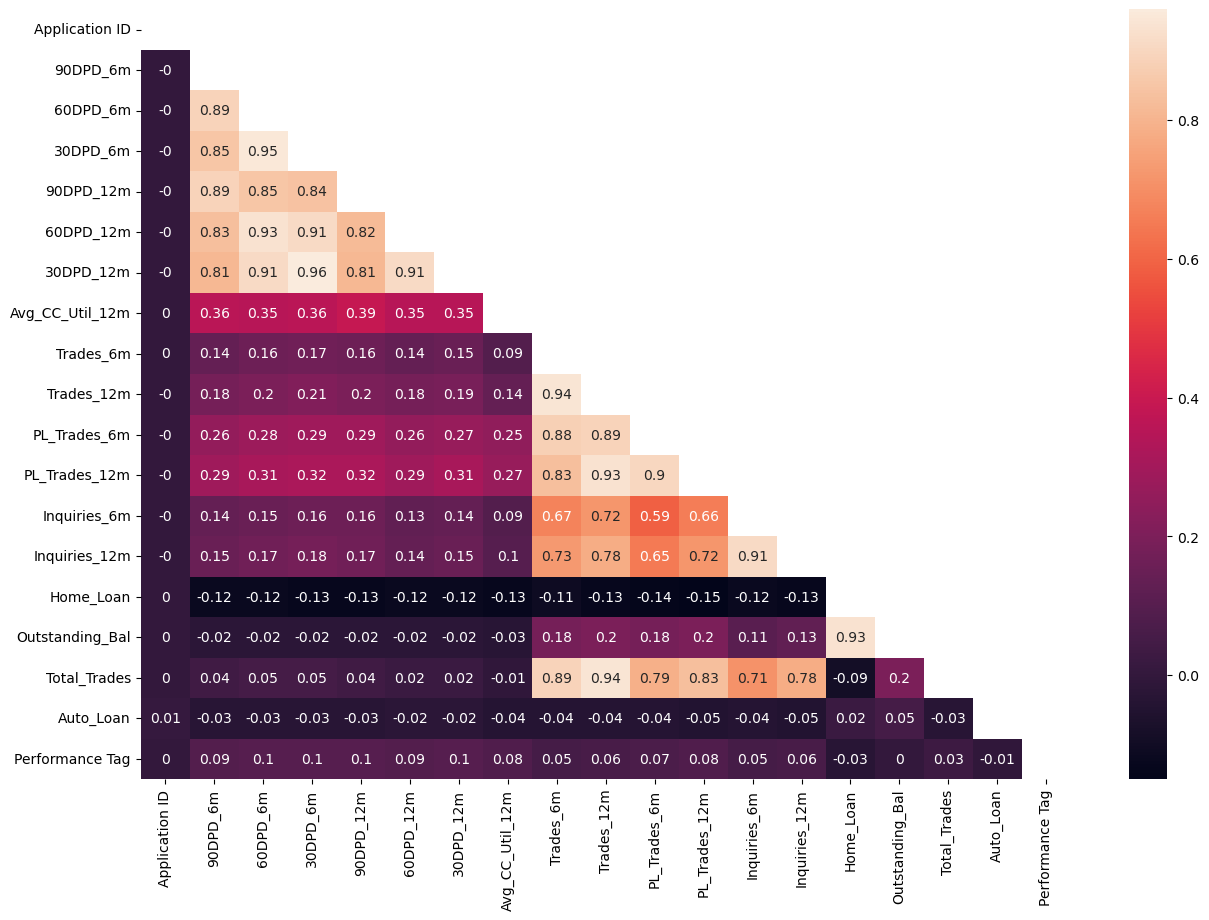

In [57]:
rar = cred_df.copy()

rename_dict = {
    'No of times 90 DPD or worse in last 6 months': '90DPD_6m', 'No of times 60 DPD or worse in last 6 months': '60DPD_6m',
    'No of times 30 DPD or worse in last 6 months': '30DPD_6m', 'No of times 90 DPD or worse in last 12 months': '90DPD_12m',
    'No of times 60 DPD or worse in last 12 months': '60DPD_12m', 'No of times 30 DPD or worse in last 12 months': '30DPD_12m',
    'Avgas CC Utilization in last 12 months': 'Avg_CC_Util_12m', 'No of trades opened in last 6 months': 'Trades_6m',
    'No of trades opened in last 12 months': 'Trades_12m', 'No of PL trades opened in last 6 months': 'PL_Trades_6m',
    'No of PL trades opened in last 12 months': 'PL_Trades_12m', 'No of Inquiries in last 6 months (excluding home & auto loans)': 'Inquiries_6m',
    'No of Inquiries in last 12 months (excluding home & auto loans)': 'Inquiries_12m', 'Presence of open home loan': 'Home_Loan',
    'Outstanding Balance': 'Outstanding_Bal', 'Total No of Trades': 'Total_Trades', 'Presence of open auto loan': 'Auto_Loan'
}

rar.rename(columns = rename_dict, inplace=True)
plt.figure(figsize = [15,10])
sns.heatmap(rar.corr().round(2), annot=True, mask=np.triu(rar.corr()))
plt.show()

    As the Creditors Data Sets describes that how the provided data is being the part of the default. 
    And hence this make to much important to get actual information
        And seems that there is highly correlation in some of the columns and makes a move towards multicollinearity
        as the data is relevent to us but we can't remove instantly lets check if any type of work can be done 

        This leads to make feature selection and engineering

In [58]:
cred_df.rename(columns = rename_dict, inplace = True)

In [59]:
cred_df.head(10).T

0            1            2            3  \
Application ID   954457215.0  432830445.0  941387308.0  392161677.0   
90DPD_6m                 0.0          0.0          0.0          0.0   
60DPD_6m                 0.0          0.0          0.0          0.0   
30DPD_6m                 0.0          0.0          0.0          0.0   
90DPD_12m                0.0          0.0          0.0          0.0   
60DPD_12m                0.0          0.0          0.0          0.0   
30DPD_12m                0.0          0.0          0.0          0.0   
Avg_CC_Util_12m          4.0          3.0          7.0         11.0   
Trades_6m                1.0          1.0          0.0          1.0   
Trades_12m               2.0          2.0          0.0          1.0   
PL_Trades_6m             0.0          0.0          0.0          0.0   
PL_Trades_12m            0.0          0.0          0.0          0.0   
Inquiries_6m             0.0          0.0          0.0          0.0   
Inquiries_12m            0.0          0.0          0.0          0.0   
Home_Loan                1.0          0.0          1.0          1.0   
Outstanding_Bal    2999395.0       3078.0    3004972.0    3355373.0   
Total_Trades             4.0          5.0          2.0          4.0   
Auto_Loan                0.0          0.0          0.0          1.0   
Performance Tag          0.0          0.0          0.0          0.0   

                           4            5            6           7  \
Application ID   182011211.0  312196805.0  532217204.0  74788849.0   
90DPD_6m                 0.0          0.0          0.0         0.0   
60DPD_6m                 0.0          0.0          0.0         0.0   
30DPD_6m                 0.0          0.0          0.0         0.0   
90DPD_12m                0.0          0.0          0.0         0.0   
60DPD_12m                0.0          0.0          0.0         0.0   
30DPD_12m                0.0          0.0          0.0         0.0   
Avg_CC_Util_12m         12.0         10.0         11.0        13.0   
Trades_6m                0.0          0.0          0.0         1.0   
Trades_12m               1.0          0.0          1.0         1.0   
PL_Trades_6m             0.0          0.0          0.0         0.0   
PL_Trades_12m            0.0          0.0          0.0         0.0   
Inquiries_6m             0.0          0.0          0.0         0.0   
Inquiries_12m            0.0          0.0          0.0         0.0   
Home_Loan                1.0          0.0          1.0         1.0   
Outstanding_Bal    3014283.0       2569.0    3005535.0   3004790.0   
Total_Trades             4.0          1.0          4.0         3.0   
Auto_Loan                0.0          0.0          0.0         0.0   
Performance Tag          0.0          0.0          0.0         0.0   

                           8           9  
Application ID   782743811.0  96964957.0  
90DPD_6m                 0.0         0.0  
60DPD_6m                 0.0         0.0  
30DPD_6m                 0.0         0.0  
90DPD_12m                0.0         0.0  
60DPD_12m                0.0         0.0  
30DPD_12m                1.0         0.0  
Avg_CC_Util_12m          9.0         6.0  
Trades_6m                0.0         1.0  
Trades_12m               0.0         1.0  
PL_Trades_6m             0.0         0.0  
PL_Trades_12m            0.0         0.0  
Inquiries_6m             0.0         0.0  
Inquiries_12m            0.0         0.0  
Home_Loan                1.0         0.0  
Outstanding_Bal    3007428.0    170860.0  
Total_Trades             2.0         1.0  
Auto_Loan                0.0         1.0  
Performance Tag          0.0         0.0

In [60]:
cred_df.columns

Index(['Application ID', '90DPD_6m', '60DPD_6m', '30DPD_6m', '90DPD_12m',
       '60DPD_12m', '30DPD_12m', 'Avg_CC_Util_12m', 'Trades_6m', 'Trades_12m',
       'PL_Trades_6m', 'PL_Trades_12m', 'Inquiries_6m', 'Inquiries_12m',
       'Home_Loan', 'Outstanding_Bal', 'Total_Trades', 'Auto_Loan',
       'Performance Tag'],
      dtype='object')

In [61]:
cred_df.pivot_table(
    values = ['90DPD_6m', '60DPD_6m', '30DPD_6m', '90DPD_12m', '60DPD_12m', '30DPD_12m'],
    index = 'Performance Tag',
    aggfunc = 'sum',
)

30DPD_12m  30DPD_6m  60DPD_12m  60DPD_6m  90DPD_12m  90DPD_6m
Performance Tag                                                               
0.0                  47351     33590      39047     25175      26714     16036
1.0                   3927      2988       3113      2192       2271      1360

In [62]:
cred_df['90DPD_6m'].value_counts()

90DPD_6m
0    54869
1    13874
2     2258
3      294
Name: count, dtype: int64

In [63]:
melted_df = cred_df[['90DPD_6m', '60DPD_6m', '30DPD_6m', '90DPD_12m', '60DPD_12m', '30DPD_12m']].melt(var_name='DPD_Type', value_name='Value')
count_df = melted_df.groupby(['DPD_Type', 'Value']).size().reset_index(name='Count')
pivot_df = count_df.pivot_table(index='DPD_Type', columns='Value', values='Count', aggfunc='sum', fill_value=0)

In [64]:
pivot_df.style.background_gradient(cmap='YlGnBu', axis=None).format("{:.0f}")

In [65]:
def plot_bar_dist(column):
    activity_counts = cred_df[column].value_counts()  

    sns.barplot(  
        x=activity_counts.index,   
        y=activity_counts.values,   
        palette='viridis'  
    )  
    
    plt.title(f'Bar Chart of {column}')  
    plt.xticks(rotation=45)

In [66]:
def plot_pi_dist(column):  
    activity_counts = cred_df[column].value_counts()  
    percentages = [f'{p:.1f}%' for p in 100 * activity_counts / activity_counts.sum()]  
    
    wedges, texts, autotexts = plt.pie(  
        activity_counts,   
        labels=activity_counts.index,   
        autopct='%1.1f%%',   
        colors=sns.color_palette('viridis', len(activity_counts)),  
        textprops=dict(color='black')  # Default color for outer labels  
    )  
    
    for i in range(len(autotexts)):  
        autotexts[i].set_color('white')  
    
    plt.title(f'Pie Chart of {column}', color='black') 

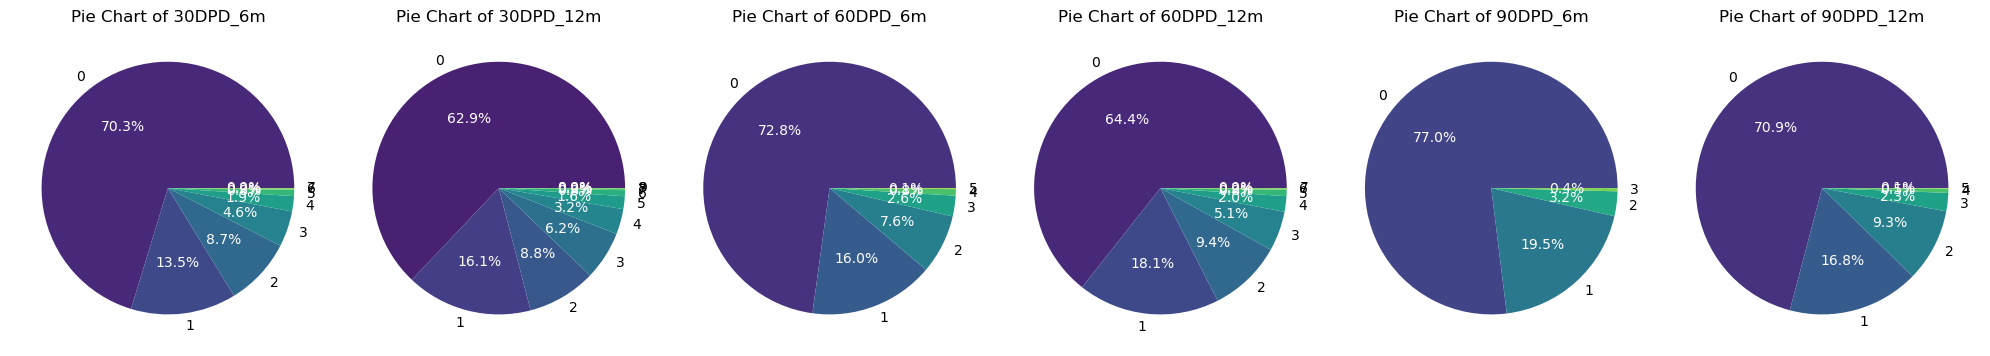

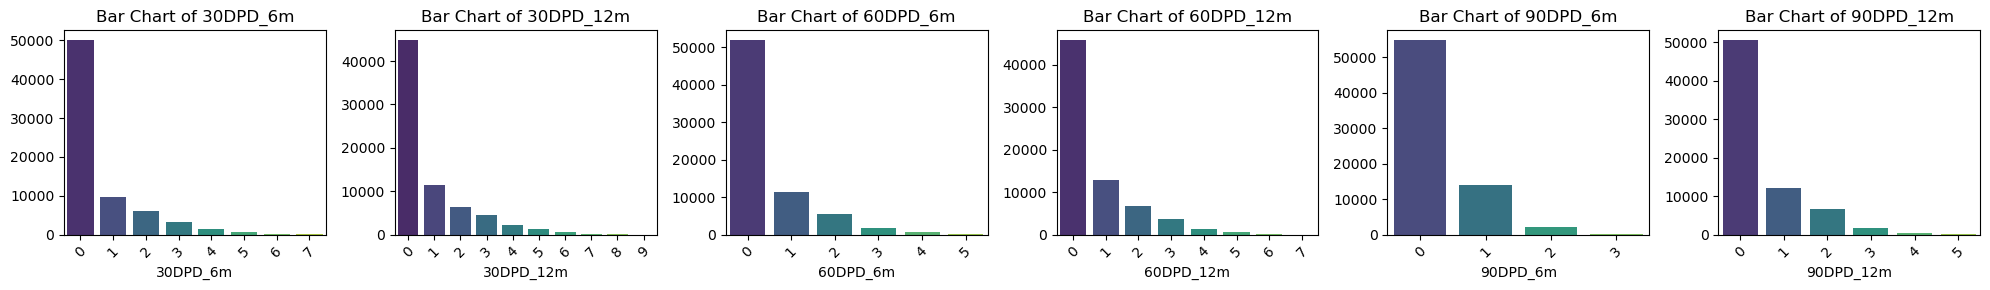

In [67]:
# Sample column names; adjust these to your actual column names  
columns = ['30DPD_6m', '30DPD_12m', '60DPD_6m', '60DPD_12m', '90DPD_6m', '90DPD_12m']  

# Pie chart  
plt.figure(figsize=[20, 30])  
for i, column in enumerate(columns, start=1):  
    plt.subplot(1, 6, i)  
    plot_pi_dist(column)  

# Display the pie charts  
plt.tight_layout()  
plt.show()  

# Bar chart  
plt.figure(figsize=[20, 3])  
for i, column in enumerate(columns, start=1):  
    plt.subplot(1, 6, i)  
    plot_bar_dist(column)  

# Display the bar charts  
plt.tight_layout()  
plt.show()  

    Insights from DPD Data Table  

    1. High 0 DPD Counts - A significant number of customers are current on their payments.  
    2. Rising Delinquency - Increasing counts for "1 DPD" and "2 DPD" indicate potential future defaults.  
    3. 60 DPD Concerns - More customers are slipping into 60 DPD status, especially over a 12-month period, 
                            suggesting worsening financial health.  
    4. ArithmeticError90 DPD Urgency - Higher counts in the 90 DPD categories necessitate immediate intervention to prevent further delinquency. 
    5. Timeframe Comparison - Analyzing both 6-month and 12-month data highlights trends in customer behavior.
       
    Recommendations  
    - Early Intervention    -    Target customers in the "1 DPD" category.  
    - Financial Counseling    -    Offer resources to those nearing higher DPD levels.  
    - Tailored Communication    -    Engage with customers showing early signs of delinquency for proactive support.

##### Some More visuals

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box(variable):  
    # Create a boxplot  
    sns.boxplot(y=cred_df[variable], color='red')  
    plt.title(f'Boxplot of {variable}')  
    plt.ylabel(variable)  

def plot_box_hist(variable):  
    # Create a histogram  
    sns.histplot(cred_df[variable], bins=30, color='black', kde=True)  # Added kde for better visualization  
    plt.title(f'Histogram of {variable}')  
    plt.xlabel(variable)

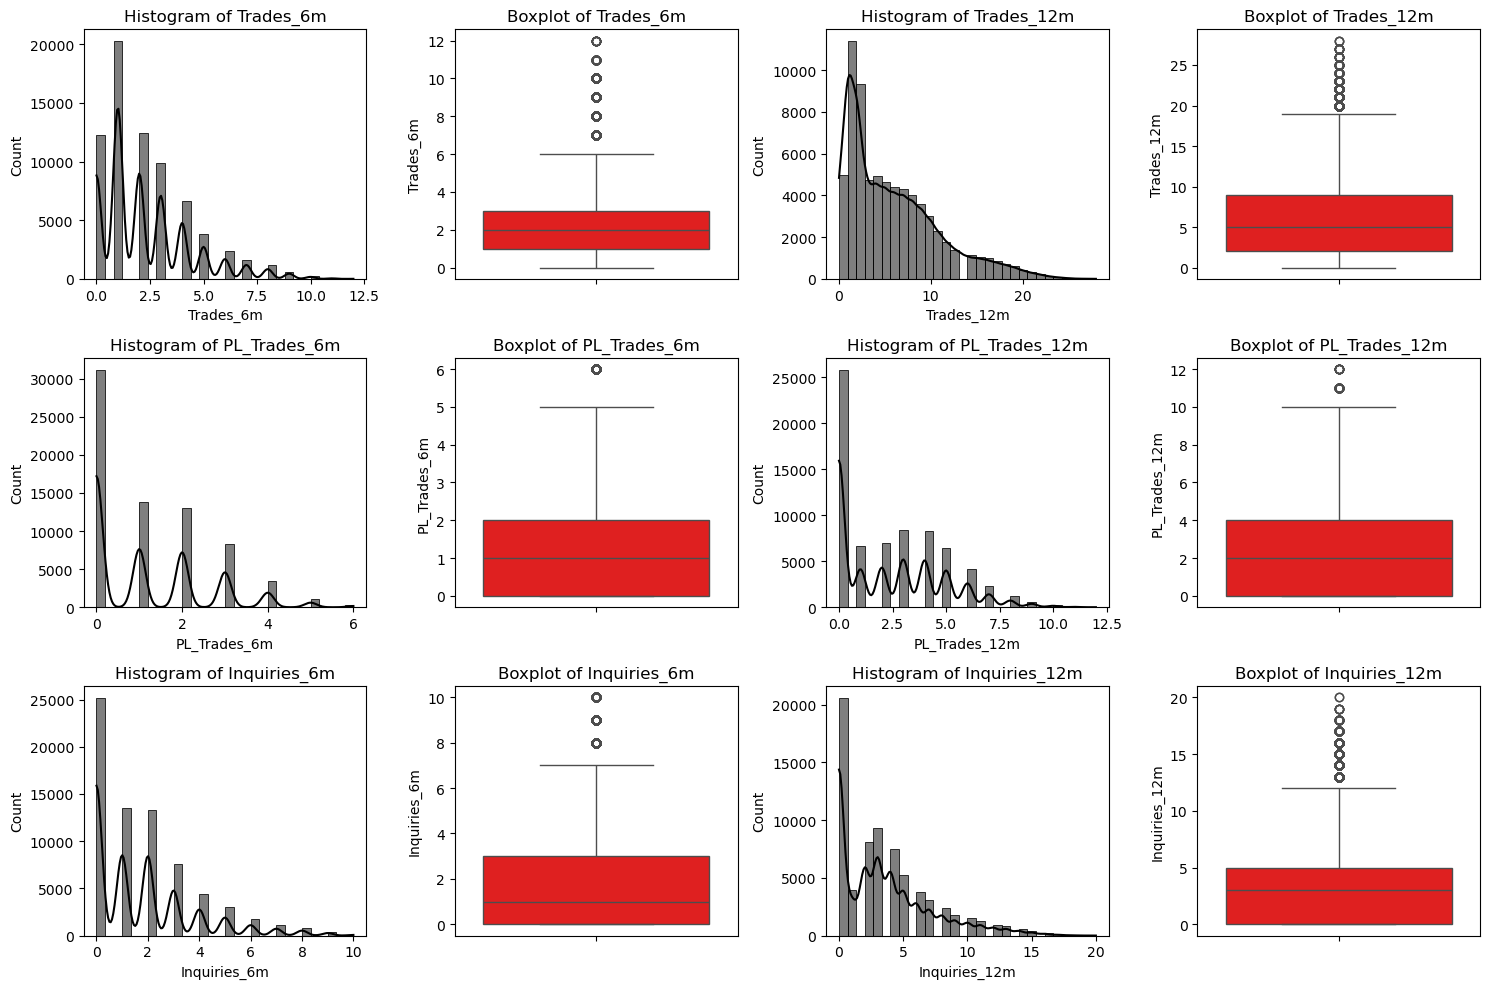

In [69]:
variables = [
    'Trades_6m', 'Trades_12m',
    'PL_Trades_6m', 'PL_Trades_12m',
    'Inquiries_6m', 'Inquiries_12m'
]
plt.figure(figsize = [15, 10])
for i, variable in enumerate(variables):
    row = i // 4 + 1 
    col = i % 4 + 1  
    
    plt.subplot(3, 4, 2*i + 1)
    plot_box_hist(variable)
    
    plt.subplot(3, 4, 2*i + 2)
    plot_box(variable)
plt.tight_layout()  
plt.show()

In [70]:
print(cred_df['Outstanding_Bal'].isnull().sum())  # Count NaN values  
print(np.isinf(cred_df['Outstanding_Bal']).sum())  # Count infinite values

272
0


In [71]:
cred_df['Outstanding_Bal'] = cred_df['Outstanding_Bal'].fillna(cred_df['Outstanding_Bal'].mean())

In [72]:
cred_df['Outstanding_Bal'] = cred_df['Outstanding_Bal'].astype(int)

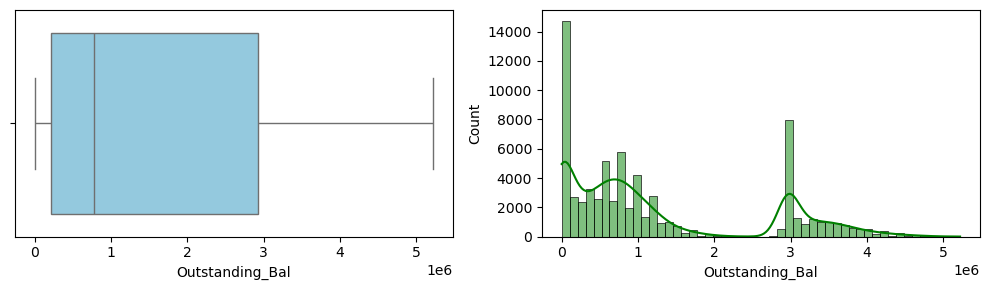

In [73]:
plt.figure(figsize = [10, 3])
plt.subplot(1, 2, 1)
sns.boxplot(x = cred_df['Outstanding_Bal'], color = 'skyblue')
plt.subplot(1, 2, 2)
sns.histplot(cred_df['Outstanding_Bal'],  kde = True, bins = 50, color='green')
plt.tight_layout()
plt.show()

In [74]:
cred_df['Home_Loan'].value_counts()

Home_Loan
0.0    52811
1.0    18212
Name: count, dtype: int64

In [75]:
cred_df['Auto_Loan'].value_counts()

Auto_Loan
0    65262
1     6033
Name: count, dtype: int64

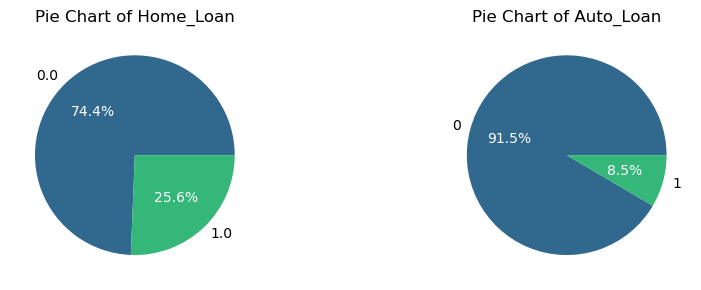

In [76]:
plt.figure(figsize = [10, 3])
plt.subplot(1, 2, 1)
plot_pi_dist('Home_Loan')  
plt.subplot(1, 2, 2)
plot_pi_dist('Auto_Loan')  
plt.tight_layout()  
plt.show() 

In [77]:
cred_df['Total_Trades'].value_counts().head()

Total_Trades
3    8638
4    7540
2    6770
5    5783
6    5085
Name: count, dtype: int64

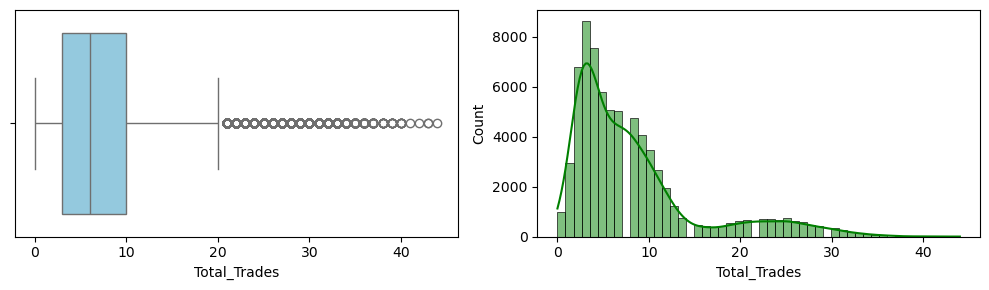

In [78]:
plt.figure(figsize = [10, 3])
plt.subplot(1, 2, 1)
sns.boxplot(x = cred_df['Total_Trades'], color = 'skyblue')
plt.subplot(1, 2, 2)
sns.histplot(cred_df['Total_Trades'],  kde = True, bins = 50, color='green')
plt.tight_layout()
plt.show()

In [79]:
cred_df.columns

Index(['Application ID', '90DPD_6m', '60DPD_6m', '30DPD_6m', '90DPD_12m',
       '60DPD_12m', '30DPD_12m', 'Avg_CC_Util_12m', 'Trades_6m', 'Trades_12m',
       'PL_Trades_6m', 'PL_Trades_12m', 'Inquiries_6m', 'Inquiries_12m',
       'Home_Loan', 'Outstanding_Bal', 'Total_Trades', 'Auto_Loan',
       'Performance Tag'],
      dtype='object')

In [80]:
train_df = pd.merge(demo_df, cred_df, on = "Application ID",suffixes = ('_dem', '_cred'))
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71281 entries, 0 to 71280
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Application ID                     71281 non-null  int64   
 1   Age                                71281 non-null  int64   
 2   Gender                             71280 non-null  object  
 3   Marital Status Onboard             71276 non-null  object  
 4   No of dependents                   71279 non-null  float64 
 5   Income                             71281 non-null  float64 
 6   Education                          71162 non-null  object  
 7   Profession                         71268 non-null  object  
 8   Type of residence                  71273 non-null  object  
 9   No of months in current residence  71281 non-null  int64   
 10  No of months in current company    71281 non-null  int64   
 11  Performance Tag_dem                69856 

In [81]:
train_df[['Performance Tag_dem', 'Performance Tag_cred']].corr()

Performance Tag_dem  Performance Tag_cred
Performance Tag_dem              1.000000              0.999646
Performance Tag_cred             0.999646              1.000000

In [82]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Gender                       1
Marital Status Onboard       5
No of dependents             2
Education                  119
Profession                  13
Type of residence            8
Performance Tag_dem       1425
Avg_CC_Util_12m           1058
Trades_6m                    1
Home_Loan                  272
Performance Tag_cred      1425
dtype: int64

In [83]:
cred_df.isnull().sum()[cred_df.isnull().sum() > 0]

Avg_CC_Util_12m    1058
Trades_6m             1
Home_Loan           272
Performance Tag    1425
dtype: int64

In [84]:
demo_df.isnull().sum()[demo_df.isnull().sum() > 0]

Gender                       1
Marital Status Onboard       5
No of dependents             2
Education                  119
Profession                  13
Type of residence            8
Performance Tag           1425
dtype: int64

In [85]:
performance_tag = train_df.pop('Performance Tag_dem')  
train_df['Performance Tag_dem'] = performance_tag

In [86]:
test_df = train_df[train_df['Performance Tag_cred'].isnull() & train_df['Performance Tag_dem'].isnull()]
test_df.head()

Application ID  Age Gender Marital Status Onboard  No of dependents  \
69589       906908303   35      M                 SINGLE               1.0   
69590        10990583   47      F                MARRIED               4.0   
69591       589678446   46      M                MARRIED               3.0   
69592       809411322   41      M                MARRIED               3.0   
69593       150246616   42      F                MARRIED               4.0   

       Income     Education Profession  Type of residence  \
69589     6.0      BACHELOR         SAL            RENTED   
69590    12.0       MASTERS          SE            RENTED   
69591     7.0  PROFESSIONAL          SE            RENTED   
69592    18.0       MASTERS         SAL            RENTED   
69593    17.0           PHD         SAL            RENTED   

       No of months in current residence  ...  PL_Trades_6m PL_Trades_12m  \
69589                                 22  ...             3             7   
69590                                122  ...             3             4   
69591                                 10  ...             2             4   
69592                                  6  ...             1             4   
69593                                  8  ...             2             3   

       Inquiries_6m  Inquiries_12m  Home_Loan  Outstanding_Bal  Total_Trades  \
69589             2              4        0.0          1309623            13   
69590             3              5        0.0           775626             7   
69591             0              3        0.0           732602             8   
69592             4              5        0.0           842057             8   
69593             3              6        0.0           786997             7   

       Auto_Loan  Performance Tag_cred  Performance Tag_dem  
69589          0                   NaN                  NaN  
69590          0                   NaN                  NaN  
69591          0                   NaN                  NaN  
69592          0                   NaN                  NaN  
69593          1                   NaN                  NaN  

[5 rows x 31 columns]

In [87]:
test_df.shape

(1425, 31)

In [88]:
train_df.drop('Performance Tag_dem', inplace = True, axis = 1)
train_df.rename(columns = {"Performance Tag_cred" : "Performance Tag"}, inplace=True)
train_df.drop(train_df[train_df['Performance Tag'].isnull()].index, inplace = True, axis = 0)

In [89]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Gender                       1
Marital Status Onboard       5
No of dependents             2
Education                  118
Profession                  12
Type of residence            8
Avg_CC_Util_12m           1023
Trades_6m                    1
Home_Loan                  272
dtype: int64

In [90]:
test_df.isnull().sum()[test_df.isnull().sum() > 0]

Education                  1
Profession                 1
Avg_CC_Util_12m           35
Performance Tag_cred    1425
Performance Tag_dem     1425
dtype: int64

In [91]:
for col in train_df.columns:
    if train_df[col].isnull().any():
        if train_df[col].dtype == 'object':
            train_df[col].fillna(train_df[col].mode()[0], inplace=True)
        else:
            train_df[col].fillna(train_df[col].mean(), inplace=True)

In [92]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

In [93]:
for col in test_df.columns:
    if test_df[col].isnull().any():
        if test_df[col].dtype == 'object':
            test_df[col].fillna(test_df[col].mode()[0], inplace=True)
        else:
            test_df[col].fillna(test_df[col].mean(), inplace=True)

In [94]:
test_df.isnull().sum()[test_df.isnull().sum() > 0]

Performance Tag_cred    1425
Performance Tag_dem     1425
dtype: int64

In [95]:
test_df.drop(['Performance Tag_cred', 'Performance Tag_dem'], inplace = True, axis = 1)

In [96]:
# Select categorical columns
cat_columns = train_df.select_dtypes(include=['object', 'category']).columns

# Select numerical columns
num_columns = train_df.select_dtypes(include=['number']).columns

# Create separate DataFrames for categorical and numerical columns
cat_df = train_df[cat_columns]
num_df = train_df[num_columns]

In [97]:
num_df.columns

Index(['Application ID', 'Age', 'No of dependents', 'Income',
       'No of months in current residence', 'No of months in current company',
       '90DPD_6m', '60DPD_6m', '30DPD_6m', '90DPD_12m', '60DPD_12m',
       '30DPD_12m', 'Avg_CC_Util_12m', 'Trades_6m', 'Trades_12m',
       'PL_Trades_6m', 'PL_Trades_12m', 'Inquiries_6m', 'Inquiries_12m',
       'Home_Loan', 'Outstanding_Bal', 'Total_Trades', 'Auto_Loan',
       'Performance Tag'],
      dtype='object')

In [98]:
train_df.groupby('Performance Tag')[['90DPD_6m', '60DPD_6m', '30DPD_6m']].mean()

90DPD_6m  60DPD_6m  30DPD_6m
Performance Tag                              
0.0              0.239541  0.376044  0.501726
1.0              0.461512  0.743642  1.013564

In [99]:
train_df.groupby('Performance Tag')[['90DPD_12m', '60DPD_12m', '30DPD_12m']].mean()

90DPD_12m  60DPD_12m  30DPD_12m
Performance Tag                                 
0.0               0.399031   0.583302   0.707340
1.0               0.770770   1.056290   1.332316

In [100]:
train_df.groupby('Performance Tag')[['Trades_6m', 'Trades_12m']].mean()

Trades_6m  Trades_12m
Performance Tag                       
0.0               2.262772    5.721135
1.0               2.787725    7.221770

In [101]:
train_df.groupby('Performance Tag')[['PL_Trades_6m', 'PL_Trades_12m']].mean()

PL_Trades_6m  PL_Trades_12m
Performance Tag                             
0.0                  1.168936       2.323479
1.0                  1.654120       3.261784

In [102]:
train_df.groupby('Performance Tag')[['Inquiries_6m', 'Inquiries_12m']].sum()

Inquiries_6m  Inquiries_12m
Performance Tag                             
0.0                    116308         232994
1.0                      6486          13237

In [103]:
train_df.groupby('Performance Tag')[['Auto_Loan', 'Home_Loan']].sum()

Auto_Loan     Home_Loan
Performance Tag                         
0.0                   5711  17526.538170
1.0                    219    609.076914

In [104]:
for col in cat_df.columns :
    print(train_df[col].value_counts())
    print(50*'-')

Gender
M    53353
F    16503
Name: count, dtype: int64
--------------------------------------------------
Marital Status Onboard
MARRIED    59542
SINGLE     10314
Name: count, dtype: int64
--------------------------------------------------
Education
PROFESSIONAL    24501
MASTERS         23475
BACHELOR        17300
PHD              4461
OTHERS            119
Name: count, dtype: int64
--------------------------------------------------
Profession 
SAL        39681
SE_PROF    16248
SE         13927
Name: count, dtype: int64
--------------------------------------------------
Type of residence
RENTED                 52279
OWNED                  13997
LIVING WITH PARENTS     1779
COMPANY PROVIDED        1603
OTHERS                   198
Name: count, dtype: int64
--------------------------------------------------
Age Group
Middle-aged    47373
Senior         22362
Young            121
Name: count, dtype: int64
--------------------------------------------------


In [105]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoded_columns = ['Gender', 'Marital Status Onboard']

for col in label_encoded_columns:
    cat_df[col] = label_encoder.fit_transform(cat_df[col])

one_hot_columns = cat_df.drop(columns=label_encoded_columns).columns
one_hot_encoded_df = pd.get_dummies(cat_df[one_hot_columns], drop_first=True, dtype=int)
cat_df_final = pd.concat([cat_df[label_encoded_columns], one_hot_encoded_df], axis=1)
cat_df_final = cat_df_final.astype(int)

In [106]:
cat_df_final.head()

Gender  Marital Status Onboard  Education_MASTERS  Education_OTHERS  \
0       0                       0                  0                 0   
1       1                       0                  0                 0   
2       1                       1                  0                 0   
3       1                       0                  0                 0   
4       0                       0                  0                 0   

   Education_PHD  Education_PROFESSIONAL  Profession _SE  Profession _SE_PROF  \
0              0                       0               0                    0   
1              0                       1               0                    1   
2              0                       0               0                    1   
3              0                       0               1                    0   
4              0                       1               0                    0   

   Type of residence_LIVING WITH PARENTS  Type of residence_OTHERS  \
0                                      0                         0   
1                                      0                         0   
2                                      0                         0   
3                                      0                         0   
4                                      0                         0   

   Type of residence_OWNED  Type of residence_RENTED  Age Group_Middle-aged  \
0                        0                         1                      1   
1                        0                         1                      1   
2                        0                         1                      1   
3                        0                         1                      1   
4                        0                         1                      1   

   Age Group_Senior  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [107]:
train_df = pd.concat([cat_df_final, num_df], axis = 1)

In [108]:
train_df.head()

Gender  Marital Status Onboard  Education_MASTERS  Education_OTHERS  \
0       0                       0                  0                 0   
1       1                       0                  0                 0   
2       1                       1                  0                 0   
3       1                       0                  0                 0   
4       0                       0                  0                 0   

   Education_PHD  Education_PROFESSIONAL  Profession _SE  Profession _SE_PROF  \
0              0                       0               0                    0   
1              0                       1               0                    1   
2              0                       0               0                    1   
3              0                       0               1                    0   
4              0                       1               0                    0   

   Type of residence_LIVING WITH PARENTS  Type of residence_OTHERS  ...  \
0                                      0                         0  ...   
1                                      0                         0  ...   
2                                      0                         0  ...   
3                                      0                         0  ...   
4                                      0                         0  ...   

   Trades_12m  PL_Trades_6m  PL_Trades_12m  Inquiries_6m  Inquiries_12m  \
0           2             0              0             0              0   
1           2             0              0             0              0   
2           0             0              0             0              0   
3           1             0              0             0              0   
4           1             0              0             0              0   

   Home_Loan  Outstanding_Bal  Total_Trades  Auto_Loan  Performance Tag  
0        1.0          2999395             4          0              0.0  
1        0.0             3078             5          0              0.0  
2        1.0          3004972             2          0              0.0  
3        1.0          3355373             4          1              0.0  
4        1.0          3014283             4          0              0.0  

[5 rows x 38 columns]

### Additional Exploratory Data Analysis
    Now, we will do Exploratory Data Analysis on demographic features and look for patterns.

    First, we will look at the client data.

    - Age
    - Gender
    - Marital Status
    - No of dependents
    - Income
    - Education
    - Profession
    - Type of residence
    - No of months in current residence
    - No of months in current company


In [109]:
def continuous_binning_eda(data_df,indpndnt_var,target_var,bin_interval=10):
    bins = np.arange(0,data_df[indpndnt_var].max() + 2, bin_interval)
    train_df[indpndnt_var+'_bins'] = pd.cut(data_df[indpndnt_var], bins, include_lowest=True)
    count_defaults = train_df.groupby(indpndnt_var+'_bins')[target_var].sum().reset_index(name = 'count_defaults')
    No_of_prospect = train_df.groupby(indpndnt_var+'_bins')[target_var].count().reset_index(name = 'No_of_prospects')
    agg_df = count_defaults.merge(No_of_prospect, on = indpndnt_var+'_bins')
    agg_df['default_rate'] = 100*(agg_df['count_defaults']/agg_df['No_of_prospects']).round(4)
    return agg_df

def categorical_eda(data_df,indpndnt_var,target_var):
    count_defaults = data_df.groupby(indpndnt_var)[target_var].sum().reset_index(name = 'count_defaults')
    No_of_prospect = data_df.groupby(indpndnt_var)[target_var].count().reset_index(name = 'No_of_prospects')
    agg_df = count_defaults.merge(No_of_prospect, on = indpndnt_var)
    agg_df['default_rate'] = 100*(agg_df['count_defaults']/agg_df['No_of_prospects']).round(4)
    return agg_df

def plot_agg_df(indpndnt_var,agg_df):
    ax = sns.barplot(x=indpndnt_var, y='default_rate', data=agg_df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

In [110]:
agg_df = continuous_binning_eda(train_df, 'Age', 'Performance Tag')
agg_df.head(10)

Age_bins  count_defaults  No_of_prospects  default_rate
0  (-0.001, 10.0]             0.0                0           NaN
1    (10.0, 20.0]             3.0              121          2.48
2    (20.0, 30.0]           239.0             5809          4.11
3    (30.0, 40.0]           831.0            18692          4.45
4    (40.0, 50.0]           958.0            22872          4.19
5    (50.0, 60.0]           718.0            17537          4.09

In [111]:
agg_df = categorical_eda(train_df, 'Gender', 'Performance Tag')
agg_df.head(10)

Gender  count_defaults  No_of_prospects  default_rate
0       0           718.0            16503          4.35
1       1          2231.0            53353          4.18

In [112]:
agg_df = categorical_eda(train_df, 'No of dependents', 'Performance Tag')
agg_df.head(10)

No of dependents  count_defaults  No_of_prospects  default_rate
0          1.000000           667.0            15215          4.38
1          2.000000           588.0            15123          3.89
2          2.859664             0.0                2          0.00
3          3.000000           696.0            15641          4.45
4          4.000000           494.0            12000          4.12
5          5.000000           504.0            11875          4.24

In [113]:
agg_df = continuous_binning_eda(train_df, 'Income', 'Performance Tag')
agg_df.head(10)

Income_bins  count_defaults  No_of_prospects  default_rate
0  (-0.001, 10.0]           711.0            12762          5.57
1    (10.0, 20.0]           604.0            13346          4.53
2    (20.0, 30.0]           602.0            13585          4.43
3    (30.0, 40.0]           485.0            13634          3.56
4    (40.0, 50.0]           384.0            10839          3.54
5    (50.0, 60.0]           161.0             5609          2.87

In [114]:
agg_df = categorical_eda(demo_df, 'Type of residence', 'Performance Tag')
agg_df.head(10)

Type of residence  count_defaults  No_of_prospects  default_rate
0     COMPANY PROVIDED            73.0             1602          4.56
1  LIVING WITH PARENTS            80.0             1778          4.50
2               OTHERS             5.0              198          2.53
3                OWNED           593.0            13997          4.24
4               RENTED          2197.0            52267          4.20

In [115]:
agg_df = continuous_binning_eda(train_df, 'No of months in current residence', 'Performance Tag')
agg_df.head(15)

No of months in current residence_bins  count_defaults  No_of_prospects  \
0                          (-0.001, 10.0]          1160.0            35074   
1                            (10.0, 20.0]           253.0             3778   
2                            (20.0, 30.0]           229.0             3481   
3                            (30.0, 40.0]           200.0             3522   
4                            (40.0, 50.0]           179.0             3301   
5                            (50.0, 60.0]           168.0             3166   
6                            (60.0, 70.0]           129.0             2906   
7                            (70.0, 80.0]           137.0             2820   
8                            (80.0, 90.0]           126.0             2741   
9                           (90.0, 100.0]           119.0             2782   
10                         (100.0, 110.0]           108.0             2890   
11                         (110.0, 120.0]            91.0             2477   

    default_rate  
0           3.31  
1           6.70  
2           6.58  
3           5.68  
4           5.42  
5           5.31  
6           4.44  
7           4.86  
8           4.60  
9           4.28  
10          3.74  
11          3.67

In [116]:
train_df['No of months in current company'].describe()

count    69856.000000
mean        34.201114
std         20.350794
min          3.000000
25%         17.000000
50%         34.000000
75%         51.000000
max        133.000000
Name: No of months in current company, dtype: float64

In [117]:
# We can take all months greater than 90 as 90 for our analysis

train_df['No of months in current company'][train_df['No of months in current company'] > 90] = 90

In [118]:
agg_df = continuous_binning_eda(train_df, 'No of months in current company', 'Performance Tag')
agg_df.head(15)

No of months in current company_bins  count_defaults  No_of_prospects  \
0                       (-0.001, 10.0]           560.0            11559   
1                         (10.0, 20.0]           490.0             9816   
2                         (20.0, 30.0]           414.0            10045   
3                         (30.0, 40.0]           432.0            10195   
4                         (40.0, 50.0]           386.0            10253   
5                         (50.0, 60.0]           321.0            10120   
6                         (60.0, 70.0]           236.0             5576   
7                         (70.0, 80.0]           110.0             2282   
8                         (80.0, 90.0]             0.0               10   

   default_rate  
0          4.84  
1          4.99  
2          4.12  
3          4.24  
4          3.76  
5          3.17  
6          4.23  
7          4.82  
8          0.00

In [119]:
train_df.drop(['Age_bins', 'Income_bins', 'No of months in current residence_bins', 'No of months in current company_bins'], inplace = True, axis = 1)

In [120]:
train_df.columns

Index(['Gender', 'Marital Status Onboard', 'Education_MASTERS',
       'Education_OTHERS', 'Education_PHD', 'Education_PROFESSIONAL',
       'Profession _SE', 'Profession _SE_PROF',
       'Type of residence_LIVING WITH PARENTS', 'Type of residence_OTHERS',
       'Type of residence_OWNED', 'Type of residence_RENTED',
       'Age Group_Middle-aged', 'Age Group_Senior', 'Application ID', 'Age',
       'No of dependents', 'Income', 'No of months in current residence',
       'No of months in current company', '90DPD_6m', '60DPD_6m', '30DPD_6m',
       '90DPD_12m', '60DPD_12m', '30DPD_12m', 'Avg_CC_Util_12m', 'Trades_6m',
       'Trades_12m', 'PL_Trades_6m', 'PL_Trades_12m', 'Inquiries_6m',
       'Inquiries_12m', 'Home_Loan', 'Outstanding_Bal', 'Total_Trades',
       'Auto_Loan', 'Performance Tag'],
      dtype='object')

In [121]:
# Select categorical columns
cat_columns = test_df.select_dtypes(include=['object', 'category']).columns

# Select numerical columns
num_columns = test_df.select_dtypes(include=['number']).columns

# Create separate DataFrames for categorical and numerical columns
cat_df = test_df[cat_columns]
num_df = test_df[num_columns]

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoded_columns = ['Gender', 'Marital Status Onboard']

for col in label_encoded_columns:
    cat_df[col] = label_encoder.fit_transform(cat_df[col])

one_hot_columns = cat_df.drop(columns=label_encoded_columns).columns
one_hot_encoded_df = pd.get_dummies(cat_df[one_hot_columns], drop_first=True, dtype=int)
cat_df_final = pd.concat([cat_df[label_encoded_columns], one_hot_encoded_df], axis=1)
cat_df_final = cat_df_final.astype(int)
test_df = pd.concat([cat_df_final, num_df], axis = 1)

In [122]:
train_df.shape

(69856, 38)

In [123]:
test_df.shape

(1425, 37)

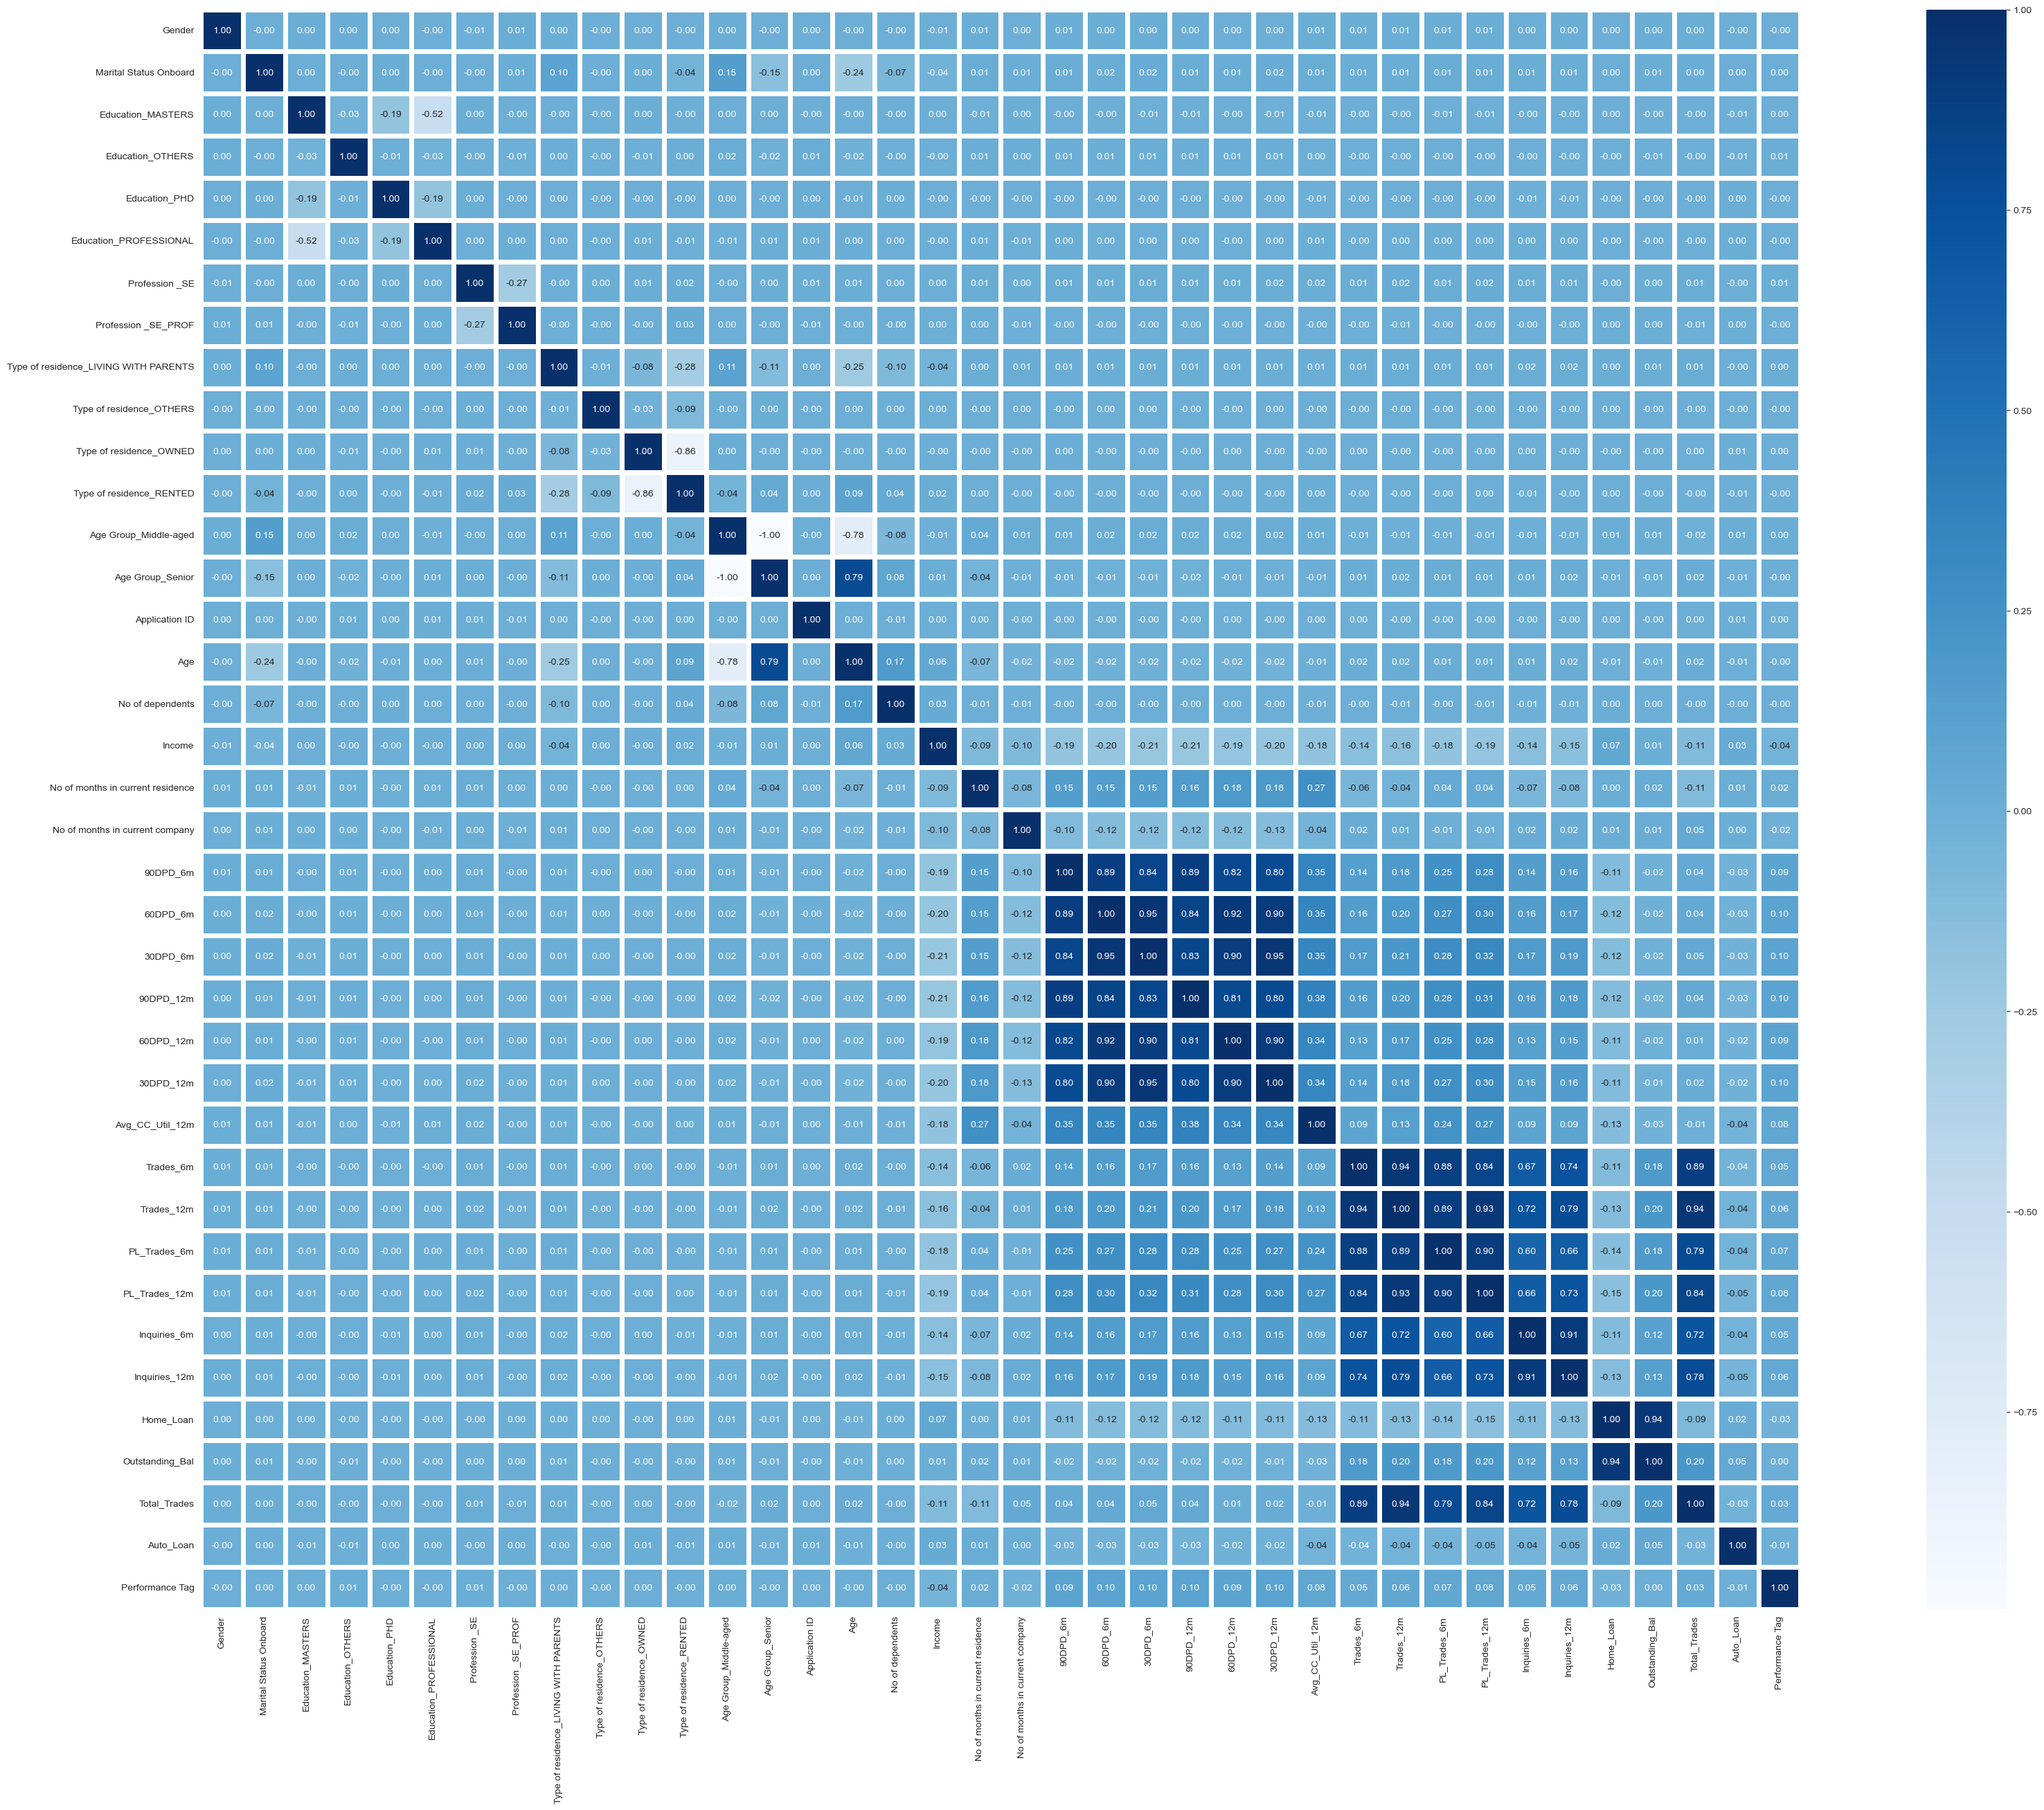

In [124]:
correlation_matrix = train_df.corr()
plt.figure(figsize = [47, 30])
sns.set_style("whitegrid")

ax = sns.heatmap(
    correlation_matrix, 
    annot = True, 
    cmap = 'Blues', 
    fmt = '.2f', 
    square = True, 
    cbar = True, 
    linewidths = 5
)
ax.set_facecolor('lightgrey')
plt.show()

In [125]:
high_corr_columns = set()  # Set to avoid duplicates

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if abs(correlation_matrix.loc[row, col]) > 0.9 and row != col:
            high_corr_columns.add(row)
            high_corr_columns.add(col)

# Print the columns with high correlations
print("Columns with high correlations (|corr| > 0.9):")
print(list(high_corr_columns))

Columns with high correlations (|corr| > 0.9):
['Outstanding_Bal', '60DPD_12m', 'Trades_6m', 'Total_Trades', '30DPD_12m', 'Age Group_Middle-aged', '30DPD_6m', 'Inquiries_12m', 'Inquiries_6m', 'Age Group_Senior', 'Home_Loan', 'Trades_12m', 'PL_Trades_12m', '60DPD_6m']


In [126]:
train_df.drop(high_corr_columns, inplace = True, axis = 1)
test_df.drop(high_corr_columns, inplace = True, axis = 1)

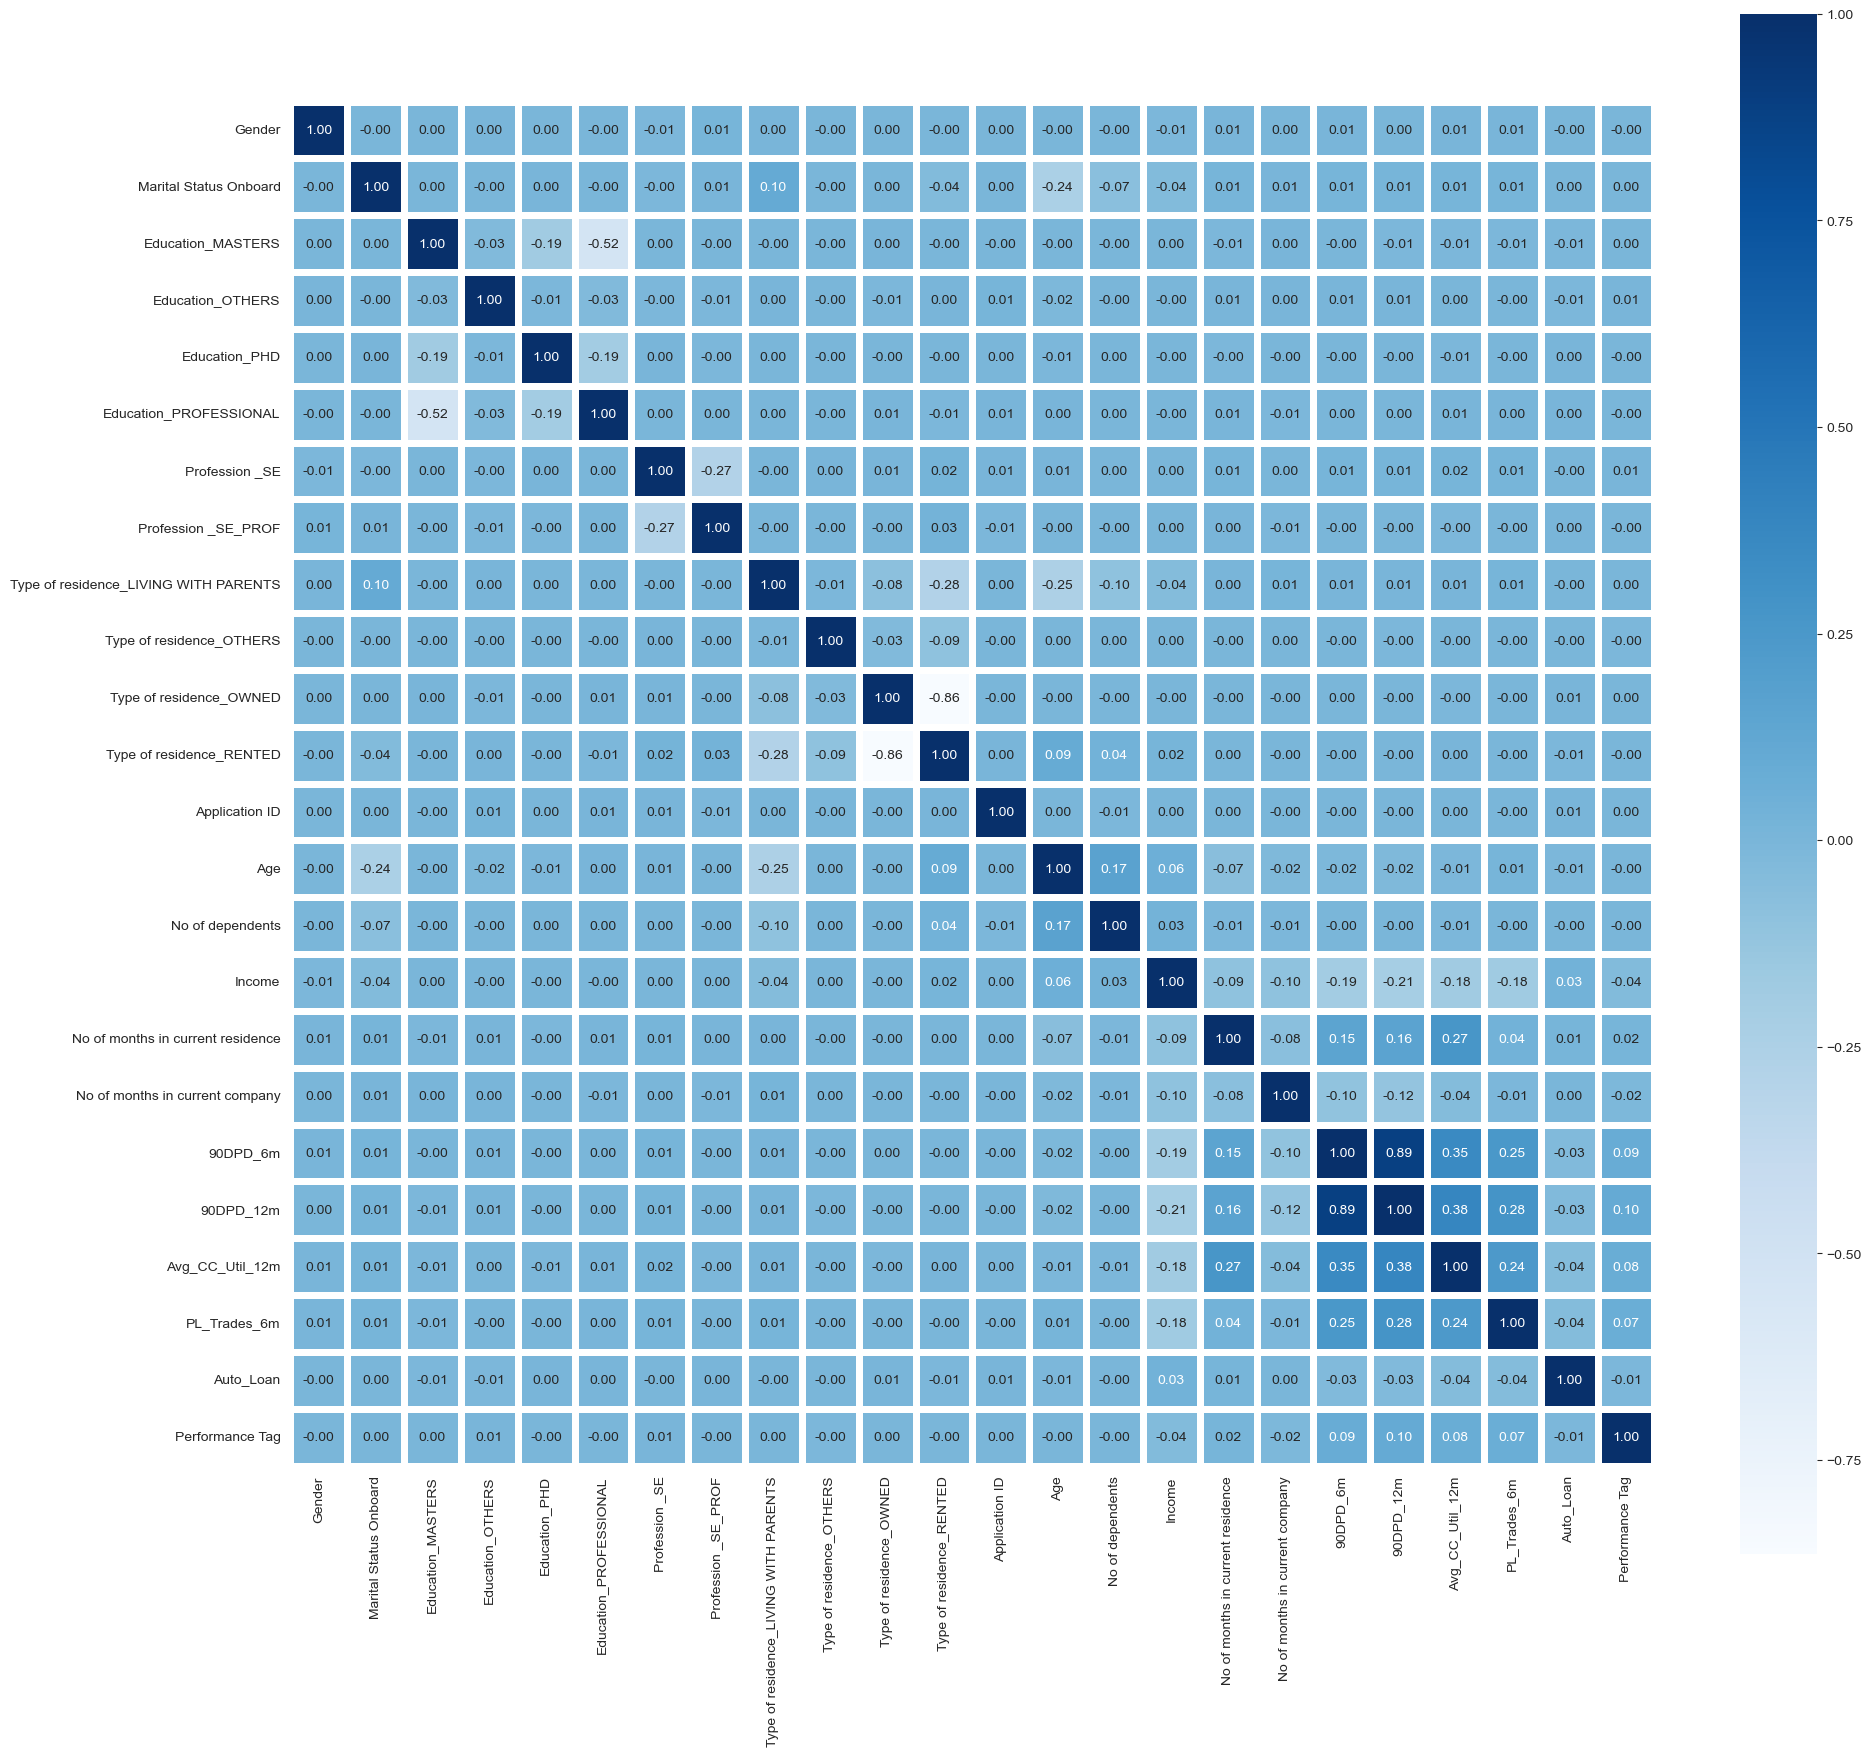

In [127]:
correlation_matrix = train_df.corr()
plt.figure(figsize = [22, 20])
sns.set_style("whitegrid")

ax = sns.heatmap(
    correlation_matrix, 
    annot = True, 
    cmap = 'Blues', 
    fmt = '.2f', 
    square = True, 
    cbar = True, 
    linewidths = 5
)
ax.set_facecolor('lightgrey')
plt.show()

In [128]:
app_id_df = train_df[['Application ID']]
train_df = train_df.drop('Application ID', axis=1)
app_id_df.shape

(69856, 1)

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [130]:
x = train_df.drop(['Performance Tag'], axis = 1)
y = train_df['Performance Tag']

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(x)

# Convert the result back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns = x.columns)

In [133]:
X_normalized_df

Gender  Marital Status Onboard  Education_MASTERS  Education_OTHERS  \
0         0.0                     0.0                0.0               0.0   
1         1.0                     0.0                0.0               0.0   
2         1.0                     1.0                0.0               0.0   
3         1.0                     0.0                0.0               0.0   
4         0.0                     0.0                0.0               0.0   
...       ...                     ...                ...               ...   
69851     1.0                     0.0                0.0               0.0   
69852     1.0                     1.0                0.0               0.0   
69853     1.0                     0.0                0.0               0.0   
69854     1.0                     0.0                0.0               0.0   
69855     1.0                     0.0                0.0               0.0   

       Education_PHD  Education_PROFESSIONAL  Profession _SE  \
0                0.0                     0.0             0.0   
1                0.0                     1.0             0.0   
2                0.0                     0.0             0.0   
3                0.0                     0.0             1.0   
4                0.0                     1.0             0.0   
...              ...                     ...             ...   
69851            0.0                     1.0             0.0   
69852            0.0                     0.0             0.0   
69853            0.0                     0.0             0.0   
69854            0.0                     0.0             1.0   
69855            0.0                     0.0             1.0   

       Profession _SE_PROF  Type of residence_LIVING WITH PARENTS  \
0                      0.0                                    0.0   
1                      1.0                                    0.0   
2                      1.0                                    0.0   
3                      0.0                                    0.0   
4                      0.0                                    0.0   
...                    ...                                    ...   
69851                  0.0                                    0.0   
69852                  0.0                                    0.0   
69853                  1.0                                    0.0   
69854                  0.0                                    0.0   
69855                  0.0                                    0.0   

       Type of residence_OTHERS  ...   Age  No of dependents    Income  \
0                           0.0  ...  0.66              0.25  0.669421   
1                           0.0  ...  0.32              0.75  0.917355   
2                           0.0  ...  0.34              0.25  0.768595   
3                           0.0  ...  0.56              0.00  0.884298   
4                           0.0  ...  0.40              1.00  0.735537   
...                         ...  ...   ...               ...       ...   
69851                       0.0  ...  0.58              0.50  0.256198   
69852                       0.0  ...  0.18              0.00  0.082645   
69853                       0.0  ...  0.36              0.75  0.107438   
69854                       0.0  ...  0.74              0.50  0.082645   
69855                       0.0  ...  0.78              0.50  0.702479   

       No of months in current residence  No of months in current company  \
0                               0.891667                         0.609195   
1                               0.883333                         0.494253   
2                               0.816667                         0.528736   
3                               0.733333                         0.574713   
4                               0.883333                         0.459770   
...                                  ...                              ...   
69851                           0.000000    

In [134]:
x_train, x_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size = 0.2, random_state = 124)

In [135]:
dt = LogisticRegression()
model = dt.fit(x_train, y_train)
model

LogisticRegression()

In [136]:
y_train_pred = model.predict(x_train)

In [137]:
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.9574296757569251
Value of confusion_matrix :  [[53505     0]
 [ 2379     0]]
Value of classification_report :                precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     53505
         1.0       0.00      0.00      0.00      2379

    accuracy                           0.96     55884
   macro avg       0.48      0.50      0.49     55884
weighted avg       0.92      0.96      0.94     55884



Text(0.5, 1.0, 'defaults')

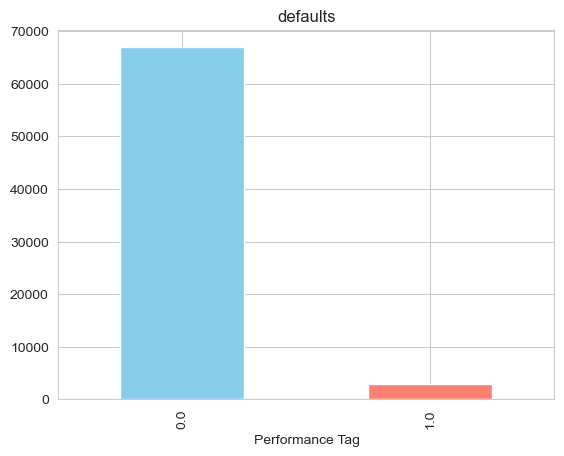

In [138]:
train_df['Performance Tag'].value_counts().plot(kind='bar', color=['skyblue', 'salmon']).set_title('defaults')

In [139]:
from imblearn.over_sampling import SMOTE

In [140]:
x = train_df.drop(['Performance Tag'], axis = 1)
y = train_df['Performance Tag']

In [141]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(x)

# Convert the result back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns = x.columns)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.3,random_state=100)

In [143]:
from imblearn.over_sampling import SMOTE

# Using the correct parameter 'sampling_strategy'
sm = SMOTE(random_state=100, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Defaults')

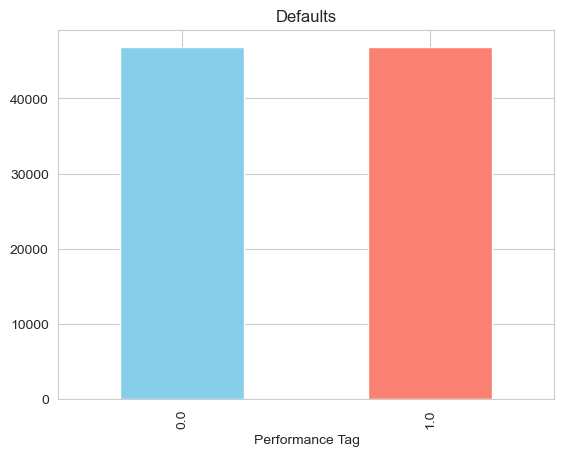

In [144]:
# Plot the value counts of y_train
y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon']).set_title('Defaults')

In [145]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [146]:
y_train_pred = logreg.predict(X_train)

In [147]:
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.6261512490116888
Value of confusion_matrix :  [[28908 17889]
 [17101 29696]]
Value of classification_report :                precision    recall  f1-score   support

         0.0       0.63      0.62      0.62     46797
         1.0       0.62      0.63      0.63     46797

    accuracy                           0.63     93594
   macro avg       0.63      0.63      0.63     93594
weighted avg       0.63      0.63      0.63     93594



In [148]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                93594
Model:                            GLM   Df Residuals:                    93571
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60617.
Date:                Thu, 13 Feb 2025   Deviance:                   1.2123e+05
Time:                        11:20:34   Pearson chi2:                 9.39e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.08695
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5591      0.064     -8.787      0.000      -0.684      -0.434
Gender                                   -0.0740      0.016     -4.613      0.000      -0.105      -0.043
Marital Status Onboard                   -0.0539      0.020     -2.653      0.008      -0.094      -0.014
Education_MASTERS                         0.0031      0.018      0.174      0.862      -0.032       0.039
Education_OTHERS                          0.2538      0.156      1.631      0.103      -0.051       0.559
Education_PHD                            -0.2313      0.032     -7.288      0.000      -0.294      -0.169
Education_PROFESSIONAL                   -0.0453      0.018     -2.509      0.012      -0.081      -0.010
Profession _SE                            0.0394      0.018      2.214      0.027       0.005       0.074
Profession _SE_PROF                       0.0082      0.017      0.483      0.629      -0.025       0.042
Type of residence_LIVING WITH PARENTS     0.2063      0.068      3.025      0.002       0.073       0.340
Type of residence_OTHERS                 -0.9210      0.203     -4.534      0.000      -1.319      -0.523
Type of residence_OWNED                   0.3023      0.054      5.641      0.000       0.197       0.407
Type of residence_RENTED                  0.3274      0.052      6.297      0.000       0.226       0.429
Age                                      -0.0927      0.040     -2.310      0.021      -0.171      -0.014
No of dependents                         -0.0619      0.021     -2.961      0.003      -0.103      -0.021
Income                                   -0.3627      0.030    -12.081      0.000      -0.422      -0.304
No of months in current residence        -0.4253      0.025    -16.699      0.000      -0.475      -0.375
No of months in current company          -0.3847      0.031    -12.311      0.000      -0.446      -0.323
90DPD_6m                                 -0.0614      0.085     -0.722      0.470      -0.228       0.105
90DPD_12m                                 1.8411      0.097     18.953      0.000       1.651       2.032
Avg_CC_Util_12m                           1.0502      0.031     34.089      0.000       0.990       1.111
PL_Trades_6m                              1.2666      0.033     37.906      0.000       1.201       1.332
Auto_Loan                                -0.1783      0.027     -6.666      0.000      -0.231      -0.126
=========================================================================================================
"""

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [150]:
logistic = LogisticRegression(class_weight='balanced')
steps = [("logistic", logistic)]
dem_logistic = Pipeline(steps)
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
model = GridSearchCV(estimator=dem_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [151]:
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [152]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.6746756921746109
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [153]:
y_pred = model.predict(X_test)

In [154]:
print("Value of confusion_matrix : ", confusion_matrix(y_test, y_pred))

Value of confusion_matrix :  [[12468  7642]
 [  341   506]]


In [155]:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average = 'binary')
print("Sensitivity : ", round(sensitivity, 2), "\n", "Specificity : ", round(specificity, 2), sep='')

Sensitivity : 0.6
Specificity : 0.62


In [156]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("Area Under Curve : ", round(roc_auc_score(y_test, y_pred_prob),2))

Area Under Curve :  0.65


In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.62      0.76     20110
         1.0       0.06      0.60      0.11       847

    accuracy                           0.62     20957
   macro avg       0.52      0.61      0.44     20957
weighted avg       0.94      0.62      0.73     20957



In [158]:
accuracy_score(y_test, y_pred)

0.6190771579901704

In [159]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])

In [160]:
y_train_pred  = model.predict_proba(X_train)[:, 1]
y_train_pred[:10]

array([0.30451077, 0.55063743, 0.66499197, 0.39844261, 0.59181511,
       0.24960777, 0.23747241, 0.55449113, 0.46517026, 0.50405575])

In [161]:
y_train_pred.shape

(93594,)

In [162]:
app_id_df.isnull().sum()

Application ID    0
dtype: int64

In [163]:
y_train_pred_final = pd.DataFrame({
    'Default': y_train, 
    'Default_Prob': y_train_pred, 
    'Application_id': app_id_df['Application ID']
})

In [164]:
y_train_pred_final.shape

(93594, 3)

In [165]:
y_train_pred_final.sort_values(by = 'Default_Prob', ascending = False)

Default  Default_Prob  Application_id
19804      0.0      0.931601     592246023.0
28240      0.0      0.925907     864429994.0
28294      0.0      0.925839     731596626.0
25309      0.0      0.924428     805488499.0
46606      1.0      0.923956     877643705.0
...        ...           ...             ...
43861      0.0      0.101495     324443947.0
40062      0.0      0.098444     925550028.0
43169      0.0      0.093643     230906923.0
41706      0.0      0.087764     188283387.0
34660      0.0      0.085975     663055001.0

[93594 rows x 3 columns]

In [166]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Default  Default_Prob  Application_id  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0.0      0.304511     954457215.0    1    1    1    1    0    0    0   
1      0.0      0.550637     432830445.0    1    1    1    1    1    1    0   
2      0.0      0.664992     941387308.0    1    1    1    1    1    1    1   
3      0.0      0.398443     392161677.0    1    1    1    1    0    0    0   
4      0.0      0.591815     182011211.0    1    1    1    1    1    1    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [167]:
cutoff_df = pd.DataFrame( columns = ['prob', 'accuracy', 'sensi', 'speci'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Default, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

In [168]:
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500043  1.000000  0.000085
0.2   0.2  0.501656  0.999722  0.003590
0.3   0.3  0.559512  0.978503  0.140522
0.4   0.4  0.641537  0.820266  0.462807
0.5   0.5  0.626044  0.634442  0.617646
0.6   0.6  0.580913  0.365387  0.796440
0.7   0.7  0.528282  0.124794  0.931769
0.8   0.8  0.504049  0.018057  0.990042
0.9   0.9  0.500128  0.000534  0.999722

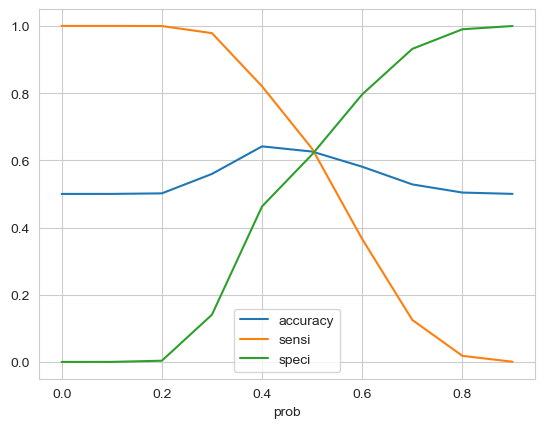

In [169]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensi', 'speci'])
plt.show()

In [170]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)

In [171]:
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.6261512490116888
Value of confusion_matrix :  [[28908 17889]
 [17101 29696]]
Value of classification_report :                precision    recall  f1-score   support

         0.0       0.63      0.62      0.62     46797
         1.0       0.62      0.63      0.63     46797

    accuracy                           0.63     93594
   macro avg       0.63      0.63      0.63     93594
weighted avg       0.63      0.63      0.63     93594



In [172]:
from sklearn import metrics

y_test_pred = logreg.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score \t\t\t:",round((metrics.roc_auc_score(y_test, y_test_pred))*100, 2))
print('precision score\t\t\t:',round((metrics.precision_score(y_test, y_test_pred))*100, 2))
print('Sensitivity/Recall \t\t:',round((TP / float(TP+FN))*100, 2))
print('Specificity\t\t\t:',round((TN / float(TN+FP))*100, 2))
print('False Positive Rate\t\t:',round((FP/ float(TN+FP))*100, 2))
print('Positive predictive value\t:',round((TP / float(TP+FP))*100, 2))
print('Negative Predictive value\t:',round((TN / float(TN+ FN))*100, 2))
print("Accuracy \t\t\t:",round((metrics.accuracy_score(y_test,y_test_pred))*100, 2))

Roc_auc_score 			: 60.74
precision score			: 6.18
Sensitivity/Recall 		: 59.5
Specificity			: 61.98
False Positive Rate		: 38.02
Positive predictive value	: 6.18
Negative Predictive value	: 97.32
Accuracy 			: 61.88


In [173]:
confuse = confusion_matrix(y_train, y_train_pred)

In [174]:
True_Negative = confuse[0][0]
False_Positive = confuse[0][1]
False_Negative = confuse[1][0]
True_Positive = confuse[1][1]

In [175]:
print(f"True_Negative : {True_Negative}, False_Positive : {False_Positive},\n False_Negative : {False_Negative}, True_Positive : {True_Positive}")

True_Negative : 28908, False_Positive : 17889,
 False_Negative : 17101, True_Positive : 29696


In [176]:
# Sensitivity or True Positive Rateof this model!
Senstivity = True_Positive / float(True_Positive + False_Negative)
Senstivity

0.6345705921319743

In [177]:
# Specificity or True Negative Rate of this Model!
specificity =  True_Negative / float(True_Negative + False_Positive)
specificity

0.6177319058914033

In [178]:
# False Negative Rate of the Model!
FNR = False_Negative / float(True_Positive + False_Negative)
FNR

0.36542940786802575

In [179]:
# False Positive Rate of the Model!
FPR = False_Positive / float(True_Negative + False_Positive)
FPR

0.3822680941085967

In [180]:
# Calculate Negative Predictive Value (NPV)
NPV = True_Negative / float(True_Negative + False_Negative)
NPV

0.6283118520289509

In [181]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [182]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV
import graphviz
from sklearn.tree import export_graphviz

In [183]:
x = train_df.drop(['Performance Tag'], axis = 1)
y = train_df['Performance Tag']

In [184]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(x)

# Convert the result back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns = x.columns)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.3,random_state=100)

In [186]:
from imblearn.over_sampling import SMOTE

# Using the correct parameter 'sampling_strategy'
sm = SMOTE(random_state=100, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Defaults')

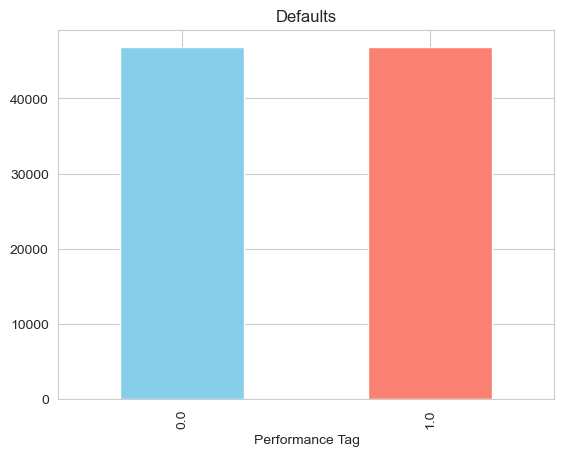

In [187]:
# Plot the value counts of y_train
y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon']).set_title('Defaults')

In [188]:
clf = DecisionTreeClassifier(random_state=42)

In [189]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [190]:
y_pred = clf.predict(X_test)

In [191]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8995


In [192]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
cv_scores = cross_val_score(clf, X_train, y_train, cv = cv)

In [193]:
cv_scores

array([0.93893905, 0.939313  , 0.94064854, 0.94022117, 0.94251523])

In [194]:
dt_rgs = DecisionTreeClassifier()

hyp_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth' : np.arange(3, 15),
    'min_samples_split' : np.arange(2, 20),
    'min_samples_leaf' : np.arange(1, 20)
}

model_2 = RandomizedSearchCV(dt_rgs, hyp_grid, cv = 5)

In [195]:
model_2.fit(X_train, y_train)
model_2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=15,
                       min_samples_split=5)

In [196]:
decision = DecisionTreeClassifier(max_depth=14, min_samples_split=18)
decision.fit(X_train, y_train)
decision

DecisionTreeClassifier(max_depth=14, min_samples_split=18)

In [197]:
y_train_pred = decision.predict(X_train)

In [198]:
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.9344936641237687
Value of confusion_matrix :  [[46187   610]
 [ 5521 41276]]
Value of classification_report :                precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     46797
         1.0       0.99      0.88      0.93     46797

    accuracy                           0.93     93594
   macro avg       0.94      0.93      0.93     93594
weighted avg       0.94      0.93      0.93     93594



In [199]:
confuse = confusion_matrix(y_train, y_train_pred)

In [200]:
True_Negative = confuse[0][0]
False_Positive = confuse[0][1]
False_Negative = confuse[1][0]
True_Positive = confuse[1][1]

In [201]:
print(f"True_Negative : {True_Negative}, False_Positive : {False_Positive},\n False_Negative : {False_Negative}, True_Positive : {True_Positive}")

True_Negative : 46187, False_Positive : 610,
 False_Negative : 5521, True_Positive : 41276


In [202]:
# Sensitivity or True Positive Rateof this model!
Senstivity = True_Positive / float(True_Positive + False_Negative)
Senstivity

0.882022351860162

In [203]:
# Specificity or True Negative Rate of this Model!
specificity =  True_Negative / float(True_Negative + False_Positive)
specificity

0.9869649763873752

In [204]:
# False Negative Rate of the Model!
FNR = False_Negative / float(True_Positive + False_Negative)
FNR

0.11797764813983802

In [205]:
# False Positive Rate of the Model!
FPR = False_Positive / float(True_Negative + False_Positive)
FPR

0.01303502361262474

In [206]:
# Calculate Negative Predictive Value (NPV)
NPV = True_Negative / float(True_Negative + False_Negative)
NPV

0.8932273536009901

In [207]:
x = train_df.drop(['Performance Tag'], axis = 1)
y = train_df['Performance Tag']

In [208]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(x)

# Convert the result back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns = x.columns)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.3,random_state=100)

In [210]:
from imblearn.over_sampling import SMOTE

# Using the correct parameter 'sampling_strategy'
sm = SMOTE(random_state=100, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [211]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier
gb_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gb_model

GradientBoostingClassifier(random_state=42)

In [212]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [213]:
y_train_pred = gb_model.predict(X_train)

In [214]:
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.9399106780349168
Value of confusion_matrix :  [[46795     2]
 [ 5622 41175]]
Value of classification_report :                precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     46797
         1.0       1.00      0.88      0.94     46797

    accuracy                           0.94     93594
   macro avg       0.95      0.94      0.94     93594
weighted avg       0.95      0.94      0.94     93594



In [215]:
x = train_df.drop(['Performance Tag'], axis = 1)
y = train_df['Performance Tag']

In [216]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(x)

# Convert the result back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns = x.columns)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.3,random_state=100)

In [218]:
from imblearn.over_sampling import SMOTE

# Using the correct parameter 'sampling_strategy'
sm = SMOTE(random_state=100, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [219]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier(random_state=42)

hyp_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator = rf_cls, param_distributions = hyp_grid, n_iter = 100,
    cv = 5, verbose = 2, random_state = 42, n_jobs = -1)

In [220]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   random_state=42, verbose=2)

In [221]:
best_rf_model = random_search.best_estimator_
print(f"Best Hyperparameters: {random_search.best_params_}")

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 14, 'bootstrap': False}


In [224]:
feature_importances = best_rf_model.feature_importances_

# Display feature importance
for feature, importance in zip(X_train.columns, feature_importances):
    print(f'{feature}: {importance}')

Gender: 0.0056982950852444095
Marital Status Onboard: 0.004743860199924391
Education_MASTERS: 0.004696794667842926
Education_OTHERS: 0.00028586669063970733
Education_PHD: 0.0026331210569522554
Education_PROFESSIONAL: 0.005847495303055093
Profession _SE: 0.004072712253023234
Profession _SE_PROF: 0.005082828352945698
Type of residence_LIVING WITH PARENTS: 0.001325236000013524
Type of residence_OTHERS: 0.0006300376617799655
Type of residence_OWNED: 0.0038007212721215683
Type of residence_RENTED: 0.005433420704329637
Age: 0.0330504833738304
No of dependents: 0.0982273823481429
Income: 0.043941084578910515
No of months in current residence: 0.07464390599837763
No of months in current company: 0.03927662398621287
90DPD_6m: 0.10518737308720014
90DPD_12m: 0.17716443435128937
Avg_CC_Util_12m: 0.11180314046288752
PL_Trades_6m: 0.266045680691179
Auto_Loan: 0.006409501874097266


In [225]:
rf_model = RandomForestClassifier(max_depth=13, max_features='log2', min_samples_leaf=2,
                       min_samples_split=17, n_estimators=50, random_state=42)
y_pred = best_rf_model.predict(X_test)

In [226]:
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.9399106780349168
Value of confusion_matrix :  [[46795     2]
 [ 5622 41175]]
Value of classification_report :                precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     46797
         1.0       1.00      0.88      0.94     46797

    accuracy                           0.94     93594
   macro avg       0.95      0.94      0.94     93594
weighted avg       0.95      0.94      0.94     93594



In [227]:
confuse = confusion_matrix(y_train, y_train_pred)

In [228]:
True_Negative = confuse[0][0]
False_Positive = confuse[0][1]
False_Negative = confuse[1][0]
True_Positive = confuse[1][1]

In [229]:
print(f"True_Negative : {True_Negative}, False_Positive : {False_Positive},\n False_Negative : {False_Negative}, True_Positive : {True_Positive}")

True_Negative : 46795, False_Positive : 2,
 False_Negative : 5622, True_Positive : 41175


In [230]:
# Sensitivity or True Positive Rateof this model!
Senstivity = True_Positive / float(True_Positive + False_Negative)
Senstivity

0.87986409385217

In [231]:
# Specificity or True Negative Rate of this Model!
specificity =  True_Negative / float(True_Negative + False_Positive)
specificity

0.9999572622176636

In [232]:
# False Negative Rate of the Model!
FNR = False_Negative / float(True_Positive + False_Negative)
FNR

0.12013590614782999

In [233]:
# False Positive Rate of the Model!
FPR = False_Positive / float(True_Negative + False_Positive)
FPR

4.273778233647456e-05

In [234]:
# Calculate Negative Predictive Value (NPV)
NPV = True_Negative / float(True_Negative + False_Negative)
NPV

0.8927447202243547

### Deep Learning

##### ANN - Sequential

In [235]:
train_df.head()

Gender  Marital Status Onboard  Education_MASTERS  Education_OTHERS  \
0       0                       0                  0                 0   
1       1                       0                  0                 0   
2       1                       1                  0                 0   
3       1                       0                  0                 0   
4       0                       0                  0                 0   

   Education_PHD  Education_PROFESSIONAL  Profession _SE  Profession _SE_PROF  \
0              0                       0               0                    0   
1              0                       1               0                    1   
2              0                       0               0                    1   
3              0                       0               1                    0   
4              0                       1               0                    0   

   Type of residence_LIVING WITH PARENTS  Type of residence_OTHERS  ...  \
0                                      0                         0  ...   
1                                      0                         0  ...   
2                                      0                         0  ...   
3                                      0                         0  ...   
4                                      0                         0  ...   

   No of dependents  Income  No of months in current residence  \
0               2.0    40.0                                113   
1               4.0    55.0                                112   
2               2.0    46.0                                104   
3               1.0    53.0                                 94   
4               5.0    44.0                                112   

   No of months in current company  90DPD_6m  90DPD_12m  Avg_CC_Util_12m  \
0                               56         0          0              4.0   
1                               46         0          0              3.0   
2                               49         0          0              7.0   
3                               53         0          0             11.0   
4                               43         0          0             12.0   

   PL_Trades_6m  Auto_Loan  Performance Tag  
0             0          0              0.0  
1             0          0              0.0  
2             0          0              0.0  
3             0          1              0.0  
4             0          0              0.0  

[5 rows x 23 columns]

In [236]:
x = train_df.drop(['Performance Tag'], axis = 1)
y = train_df['Performance Tag']

In [237]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(x)

# Convert the result back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns = x.columns)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.3,random_state=100)

In [239]:
from imblearn.over_sampling import SMOTE

# Using the correct parameter 'sampling_strategy'
sm = SMOTE(random_state=100, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Defaults')

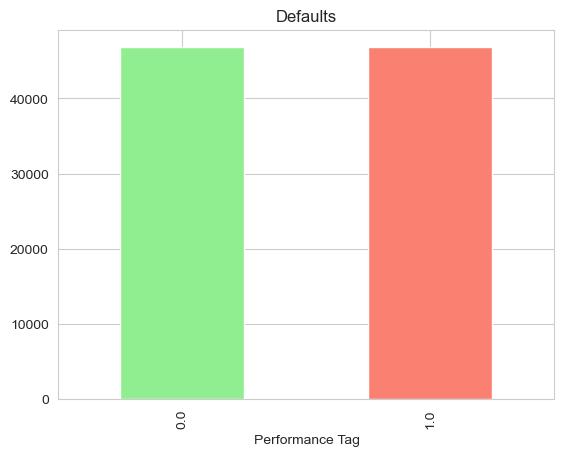

In [240]:
# Plot the value counts of y_train
y_train.value_counts().plot(kind='bar', color=['lightgreen', 'salmon']).set_title('Defaults')

In [241]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(93594, 22) (20957, 22) (93594,) (20957,)
Performance Tag
0.0    46797
1.0    46797
Name: count, dtype: int64
Performance Tag
0.0    20110
1.0      847
Name: count, dtype: int64


In [242]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal, Zeros
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [243]:
model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1], activation = 'relu', 
                    kernel_initializer = HeNormal(), 
                    bias_initializer = Zeros(),
                    kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(64, activation = 'relu', 
                    kernel_initializer = HeNormal(), 
                    bias_initializer = Zeros(),
                    kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(32, activation = 'relu', 
                    kernel_initializer = HeNormal(), 
                    bias_initializer = Zeros(),
                    kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(1, activation = 'sigmoid', 
                    kernel_initializer = HeNormal(), 
                    bias_initializer = Zeros()))

In [244]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,313 (52.00 KB)

 Trainable params: 13,313 (52.00 KB)

 Non-trainable params: 0 (0.00 B)

In [245]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [246]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6130 - loss: 1.5205 - val_accuracy: 0.5701 - val_loss: 0.6899
Epoch 2/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6357 - loss: 0.6665 - val_accuracy: 0.5458 - val_loss: 0.7014
Epoch 3/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6362 - loss: 0.6617 - val_accuracy: 0.6426 - val_loss: 0.5875
Epoch 4/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6424 - loss: 0.6562 - val_accuracy: 0.5649 - val_loss: 0.6649
Epoch 5/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6435 - loss: 0.6547 - val_accuracy: 0.5714 - val_loss: 0.6520
Epoch 6/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6459 - loss: 0.6527 - val_accuracy: 0.5815 - val_loss: 0.6240
Epoch 7/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6486 - loss: 0.6503 - val_accuracy: 0.5971 - val_loss: 0.6137
Epoch 8/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6488 - loss: 0.648

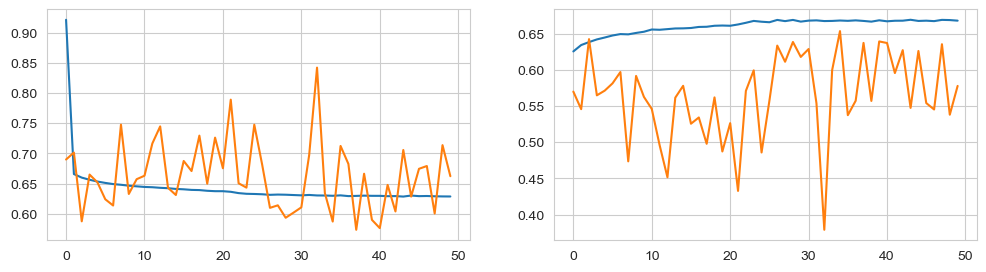

In [247]:
plt.figure(figsize = [12, 3])
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [248]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5727 - loss: 0.6652
Test Loss: 0.6622418165206909, Test Accuracy: 0.5779452919960022


##### Adjusting Some Neural Network

In [249]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', 
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [250]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           1,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

In [251]:
model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [252]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

# Fit the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5875 - loss: 0.8656 - val_accuracy: 0.5810 - val_loss: 0.6672
Epoch 2/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6304 - loss: 0.6659 - val_accuracy: 0.5907 - val_loss: 0.6364
Epoch 3/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6348 - loss: 0.6606 - val_accuracy: 0.5260 - val_loss: 0.7098
Epoch 4/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6406 - loss: 0.6552 - val_accuracy: 0.5514 - val_loss: 0.6587
Epoch 5/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6392 - loss: 0.6549 - val_accuracy: 0.5563 - val_loss: 0.6522
Epoch 6/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6432 - loss: 0.6515 - val_accuracy: 0.6036 - val_loss: 0.6134
Epoch 7/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6439 - loss: 0.6505 - val_accuracy: 0.5152 - val_loss: 0.6938
Epoch 8/100
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6475 - los

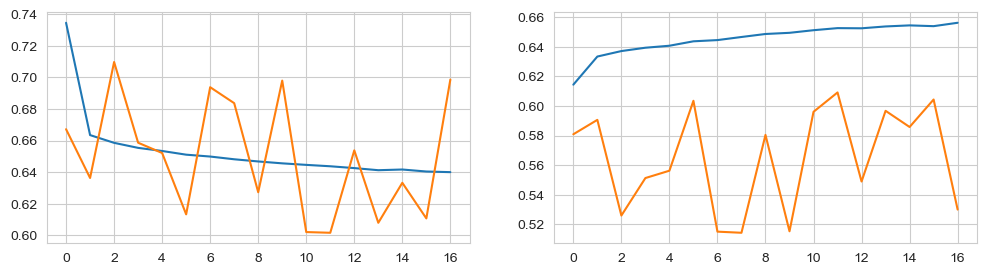

In [253]:
plt.figure(figsize = [12, 3])
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [254]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6036 - loss: 0.6044
Test Loss: 0.6016924381256104, Test Accuracy: 0.6091997623443604
